**OBLIGATORIO FINAL G448 - Data Wrangling**
<br>**INTEGRANTES:**
<br>
+ Theo Pereira, 5703834-3, theopereira2001@gmail.com
+ Carlos Píriz, 4298784-4, piriz.carlos@gmail.com
+ Gabriel	Better,3138871-2, gabrielbetter@gmail.com

In [1191]:
### Importacion de librerias ###

# Sistema
import os

# Tratamiento de datos
import pandas as pd
import numpy as np
import datetime as dt
import math

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import re

# Visualizacion 
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from babel.numbers import format_currency
import matplotlib.pyplot as plt
%matplotlib inline

**CONSIGNAS**
<br>
El objetivo general es realizar un análisis exploratorio de los anuncios inmobiliarios de
algunas provincias de la Patagonia Argentina reportados por el portal Airbnb.
<br>
Los datos están conformados por cuatro archivos csv:
+ Neuquen.csv
+ Rio_Negro.csv
+ Chubut.csv
+ Tierra_del_Fuego.csv

**<h1>1. Carga de datos y armado del dataset</h1>**

In [1192]:
# Carga de archivos de datos de Chubut
df_chubut = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Chubut.csv')
df_chubut["provincia"]="CHUBUT"
df_chubut.sample(3)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
26,32919267,Loft Patagónico,entire_home,"4,94 (109)",Esquel,-42.91138,-71.31515,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$29 USD,$37 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
222,808247601620915325,Casas Arrayanes,entire_home,NaN,Esquel,-42.90782,-71.30537,"['No hay evaluaciones', '5 camas', '3 dormitor...",2023-07-01,2023-07-06,NaN,$110 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
204,656442,Hidden House B&B - Mojarrita,private_room,"4,69 (101)",Biedma Department,-42.57150,-64.27575,"['1 cama', '1 dormitorio', '1 baño privado', '...",2023-07-01,2023-07-06,$38 USD,$78 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT


In [1193]:
# Carga de archivos de datos de Neuquen
df_neuquen = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Neuquen.csv')
df_neuquen["provincia"] = "NEUQUEN"
df_neuquen.sample(3)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
215,878902407464873092,Monoambiente en suite,entire_home,Nuevo,Neuquén,-38.95411,-68.08427,"['2 camas', 'Monoambiente', '1 baño', 'Estacio...",2023-07-01,2023-07-06,$53 USD,$66 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
216,37603595,5 - Pura tranquilidad en el corazón de Neuquén,shared_room,NaN,Confluencia Department,-38.95184,-68.05810,"['2 camas', '2 dormitorios', '2 baños comparti...",2023-07-01,2023-07-06,NaN,$60 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
245,36036128,¡BienvenidosAMIquincho!,entire_home,NaN,Neuquén,-38.95348,-68.03062,"['4 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$62 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN


In [1194]:
# Carga de archivos de datos de Rio Negro
df_rio_negro = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Rio_Negro.csv')
df_rio_negro["provincia"] = "RIO NEGRO"
df_rio_negro.sample(3)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
160,46318875,A LOS PIES DEL ARROYO,entire_home,"4,96 (23)",San Martin de los Andes,-40.13588,-71.28457,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-01,2023-07-06,NaN,$70 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
116,639078380250595296,"Monoambiente de 40 mts, luminoso, excelente vi...",entire_home,"4,95 (22)",San Martin de los Andes,-40.15197,-71.35105,"['3 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-07-01,2023-07-06,$80 USD,$94 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
238,40349728,"La Pirucha, en Av Bustillo a 2 cuadras de la p...",entire_home,"4,72 (39)",San Carlos de Bariloche,-41.10467,-71.44132,"['3 camas', '2 dormitorios', '1 ,5 baños', '1 ...",2023-09-24,2023-09-29,NaN,$47 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


In [1195]:
# Carga de archivos de datos de Tierra del Fuego
df_tierra_del_fuego = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Tierra_del_Fuego.csv')
df_tierra_del_fuego["provincia"] = "TIERRA DEL FUEGO"
df_tierra_del_fuego.sample(3)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
217,6031821,Habitación Canela - 2 camas Centro,private_room,"4,72 (274)",Ushuaia,-54.80696,-68.32723,"['2 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-01,2023-07-06,$33 USD,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
255,39086940,Sweet Home Depto 3,entire_home,"4,72 (43)",Ushuaia,-54.81902,-68.33556,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-02,2023-07-09,$33 USD,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
97,48694593,RARE: casa del propietario actualizada y equip...,entire_home,"4,78 (45)",Ushuaia,-54.80300,-68.30516,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-01,2023-07-06,NaN,$75 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


In [1196]:
# Verificacion de columnas para concatenar
(df_chubut.columns == df_neuquen.columns) & (df_rio_negro.columns == df_tierra_del_fuego.columns) & (df_chubut.columns == df_tierra_del_fuego.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [1197]:
# Concatenacion de los dataframes separados por provincias en un unico archivo
df_alquileres = pd.concat([df_chubut, df_neuquen, df_rio_negro, df_tierra_del_fuego])
df_alquileres.sample(5)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
111,766605002053365683,Centro - BIM 8°,entire_home,NaN,Neuquén,-38.948664,-68.060474,"['No hay evaluaciones', '2 camas', '1 dormitor...",2023-07-10,2023-07-15,NaN,$45 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
41,551649100670598308,Ubicación ideal en Ciudad de Neuquén.,entire_home,"4,67 (9)",Neuquén,-38.943400,-68.056310,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-03,2023-07-08,NaN,$26 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
32,53404054,Peta Lodge Patagonia II,entire_home,"4,88 (67)",San Carlos de Bariloche,-41.119630,-71.380870,"['3 camas', '1 dormitorio', '2 baños', 'Wifi',...",2023-09-20,2023-09-25,$122 USD,$139 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
42,28673402,Limay Bed&Breakfast Séxtuple,entire_home,"5,0 (6)",Neuquén,-38.979370,-68.061220,"['6 camas', '1 dormitorio', '1 baño', 'Estacio...",2023-07-01,2023-07-08,NaN,$156 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
217,33422894,Hermosa y cálida!,private_room,NaN,Neuquén,-38.944290,-68.047760,"['3 camas', '2 dormitorios', '1 baño compartid...",2023-07-01,2023-07-06,NaN,$24 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN


In [1198]:
# Reseteo del index, permitiendo duplicados porque aun no sabemos si son unicos los valores
df_alquileres.reset_index(drop=True, inplace= True)
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
0,855050336912355203,North Beach,entire_home,NaN,Puerto Madryn,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,NaN,$38 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,NaN,Puerto Madryn,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
2,800749301724167838,Departamento Bella Vista,entire_home,"5,0 (6)",Puerto Madryn,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,NaN,$43 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,"4,91 (70)",Puerto Madryn,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
4,916738743930751566,Front Beach,entire_home,Nuevo,Puerto Madryn,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT


*Verificacion de filas de los dataframes*

In [1199]:
# Verificacion de la cantidad de filas de cada dataframe
print("La cantidad de filas del dataframe de Chubut es:"+str(df_chubut.shape[0]))
print("La cantidad de filas del dataframe de Neuquen es:"+str(df_neuquen.shape[0]))
print("La cantidad de filas del dataframe de Rio Negro es:"+str(df_rio_negro.shape[0]))
print("La cantidad de filas del dataframe de Tierra del fuego es:" + str(df_tierra_del_fuego.shape[0]))
print("La cantidad de filas del dataframe unificado de alquileres es:" + str(df_alquileres.shape[0]))


La cantidad de filas del dataframe de Chubut es:270
La cantidad de filas del dataframe de Neuquen es:270
La cantidad de filas del dataframe de Rio Negro es:270
La cantidad de filas del dataframe de Tierra del fuego es:270
La cantidad de filas del dataframe unificado de alquileres es:1080


*Verificacion de las columnas de los dataframes*

In [1200]:
# Verificacion de la cantidad de columnas de cada dataframe
print("La cantidad de columnas del dataframe de Chubut es:" +
      str(df_chubut.shape[1]))
print("La cantidad de columnas del dataframe de Neuquen es:" +
      str(df_neuquen.shape[1]))
print("La cantidad de columnas del dataframe de Rio Negro es:" +
      str(df_rio_negro.shape[1]))
print("La cantidad de columnas del dataframe de Tierra del fuego es:" +
      str(df_tierra_del_fuego.shape[1]))
print("La cantidad de columnas del dataframe unificado de alquileres es:" +
      str(df_alquileres.shape[1]))

La cantidad de columnas del dataframe de Chubut es:18
La cantidad de columnas del dataframe de Neuquen es:18
La cantidad de columnas del dataframe de Rio Negro es:18
La cantidad de columnas del dataframe de Tierra del fuego es:18
La cantidad de columnas del dataframe unificado de alquileres es:18


*Verificacion general e inicial del dataframe unificado*

In [1201]:
# Informacion de las columnas, sus tipos y faltantes
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1080 non-null   int64  
 1   name              1080 non-null   object 
 2   category          1080 non-null   object 
 3   rating            886 non-null    object 
 4   city              1076 non-null   object 
 5   latitude          1080 non-null   float64
 6   longitude         1080 non-null   float64
 7   characteristics   1080 non-null   object 
 8   check_in          1080 non-null   object 
 9   check_out         1080 non-null   object 
 10  price_discounted  201 non-null    object 
 11  price_original    1080 non-null   object 
 12  price_qualifier   1080 non-null   object 
 13  cant_resultados   1080 non-null   int64  
 14  fecha_scrapping   1080 non-null   object 
 15  fecha_cambio_bna  1080 non-null   object 
 16  cambio_bna        1080 non-null   float64


In [1202]:
# Informacion de valores generales
df_alquileres.describe()

,id_alojamiento,latitude,longitude,cant_resultados,cambio_bna
count,1.080000e+03,1080.000000,1080.000000,1080.000000,1080.000000
mean,3.685341e+17,-44.426201,-68.723924,824.500000,239.919355
std,3.903051e+17,6.164758,2.159715,304.115744,0.000000
min,4.468310e+05,-54.844914,-71.688000,298.000000,239.919355
25%,3.529220e+07,-47.854503,-71.310280,824.500000,239.919355
50%,5.408344e+07,-42.003780,-68.305610,1000.000000,239.919355
75%,7.872495e+17,-39.609811,-68.049328,1000.000000,239.919355
max,9.198428e+17,-38.874370,-62.920960,1000.000000,239.919355


In [1203]:
# Revision de filas duplicadas
df_alquileres.duplicated(keep="first").sum()

51

In [1204]:
# Informacion de columnas con valores faltantes
df_alquileres.isna().sum()

id_alojamiento        0
name                  0
category              0
rating              194
city                  4
latitude              0
longitude             0
characteristics       0
check_in              0
check_out             0
price_discounted    879
price_original        0
price_qualifier       0
cant_resultados       0
fecha_scrapping       0
fecha_cambio_bna      0
cambio_bna            0
provincia             0
dtype: int64

*Conclusiones iniciales*
<br>
+ El dataframe unificado, coincide en cantidad de filas y columnas correspondientes a los dataframes individuales
+ Debemos de corregir algunos tipos de datos de columnas
+ Tenemos algunas columnas para reescalar
+ Tenemos filas duplicadas para revisar
+ Tenemos valores nulos para revisar, en principio para las columnas rating y price_discounted

**<h1>2. Análisis de duplicados</h1>**

*Analisis y tratamiento de duplicados global*

In [1205]:
# Verifico los duplicados, que coinciden en toda la fila
df_alquileres.duplicated(keep="first").sum()

51

In [1206]:
#  Listado de los valores duplicados
df_alquileres[df_alquileres.duplicated(keep="first")]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
54,40755147,La Amarilla Casa de Huéspedes (con cocina) Rut...,entire_home,"4,93 (27)",Epuyén,-42.227509,-71.362289,"['2 camas', '1 dormitorio', '1 ,5 baños', '1 c...",2023-07-01,2023-07-06,NaN,$45 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
72,586216477715336949,Encantador dpto. con vista al mar en Puerto Ma...,entire_home,"5,0 (11)",Puerto Madryn,-42.771633,-65.029068,"['3 camas', '2 dormitorios', '2,5 baños', 'Cal...",2023-07-06,2023-07-11,NaN,$131 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
90,37836757,Rincón del Sol,entire_home,"4,4 (5)",Puerto Madryn,-42.751650,-65.053520,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$18 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
113,736253141994173324,Refugio Ciprés con tina de agua caliente,entire_home,"5,0 (4)",Trevelin,-42.968260,-71.601320,"['1 cama', '1 dormitorio', '1 baño', 'Califica...",2023-07-01,2023-07-06,NaN,$45 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
127,21925703,Hermoso Duplex con Patio y Parrilla. (4 pax).,entire_home,"4,81 (74)",Puerto Madryn,-42.787700,-65.023850,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-01,2023-07-06,NaN,$57 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
128,644043911246503372,"Los Molles, casa familiar en entorno natural.",entire_home,NaN,Puerto Madryn,-42.735607,-65.100117,"['3 camas', '2 dormitorios', '1 baño']",2023-07-01,2023-07-07,NaN,$28 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
129,883174783781736766,Espacio 2 - Rada Tilly,entire_home,Nuevo,Rada Tilly,-45.925810,-67.575650,"['1 cama', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,NaN,$52 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
138,53298317,Mar de Olivillos Planta alta,entire_home,"5,0 (12)",Puerto Piramides,-42.569200,-64.273610,"['2 camas', 'Monoambiente', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$75 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
162,31081731,"Domos Puelo, para dos, con jacuzzi",entire_home,"4,98 (40)",Lago Puelo,-42.041570,-71.592370,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-08,2023-07-15,NaN,$67 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
182,50704005,Hostel patagónico con vista 360 de la Cordillera,shared_room,"4,86 (7)",Trevelin,-43.071450,-71.454920,"['20 camas', '4 dormitorios', '3,5 baños compa...",2023-07-01,2023-07-06,NaN,$17 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT


In [1207]:
# Eliminamos los duplicados, que coinciden en toda la fila
df_alquileres.drop_duplicates(keep="first", inplace=True)
df_alquileres.shape

(1029, 18)

*Analisis y tratamiento de duplicados por columna*

+ Columna 0: id_alojamiento

In [1208]:
# Buscamos si hay duplicados
df_alquileres['id_alojamiento'].duplicated(keep='first').sum()

1

In [1209]:
# Identificamos filas con esos valores duplicados
df_alquileres[df_alquileres['id_alojamiento'].duplicated(keep='first')]

#########################  posible cambio para la entrega: capaz que al ser solo un duplocado ver las dos filas que repiten el id_alojamiento:
#########################  df_alquileres[df_alquileres['id_alojamiento'].duplicated(keep=False)]
#########################  de esta manera podemos ahorrarnos la celda siguiente de buscar manualmente por el id_alojamiento

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
648,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


In [1210]:
# Verificamos las filas que corresponden a los valores duplicados, todas
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
647,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
648,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


-> Analisis de los valores de las filas duplicadas.

In [1211]:
#Verificamos los valores 
df_alquileres.loc[648]

id_alojamiento                                               53729814
name                                                     Pequeña casa
category                                                  entire_home
rating                                                       5,0 (36)
city                                          San Carlos de Bariloche
latitude                                                    -41.14768
longitude                                                   -71.31827
characteristics     ['1 cama', '1 dormitorio', '1 baño', '1 cama d...
check_in                                                   2023-08-18
check_out                                                  2023-08-23
price_discounted                                                  NaN
price_original                                                $39 USD
price_qualifier                                                 noche
cant_resultados                                                  1000
fecha_scrapping     

In [1212]:
# Verificamos los valores
df_alquileres.loc[648]

id_alojamiento                                               53729814
name                                                     Pequeña casa
category                                                  entire_home
rating                                                       5,0 (36)
city                                          San Carlos de Bariloche
latitude                                                    -41.14768
longitude                                                   -71.31827
characteristics     ['1 cama', '1 dormitorio', '1 baño', '1 cama d...
check_in                                                   2023-08-18
check_out                                                  2023-08-23
price_discounted                                                  NaN
price_original                                                $39 USD
price_qualifier                                                 noche
cant_resultados                                                  1000
fecha_scrapping     

In [1213]:
# Verificamos los valores para la variable que tendria diferencia
df_alquileres.loc[647]["characteristics"]

"['1 cama', '1 dormitorio', '1 baño', '1 cama doble', 'Estacionamiento gratis', 'Wifi']"

In [1214]:
# Verificamos los valores para la variable que tendria fiferencia
df_alquileres.iloc[648]["characteristics"]

"['7 camas', '3 dormitorios', '2,5 baños', '1 cama doble', '4 camas de una plaza', 'más', 'Estacionamiento gratis', 'Wifi']"

*ACCION:*
<BR>
*Vemos que seria el mismo registro con excepcion de la serie characteristics, donde tiene agregada comentario de calificacion*
<br>
*Como consideramos que cada valor de id_alojamiento, deberia ser unico, eliminamos el que consideramos repetido y menos se adecua a los valores esperados por serie*

In [1215]:
# Descartamos el registro que no tiene agregado el comentario de la calificacion
df_alquileres.drop([648], inplace=True)
df_alquileres[df_alquileres['id_alojamiento'] == 53729814]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
647,53729814,Pequeña casa,entire_home,"5,0 (36)",San Carlos de Bariloche,-41.14768,-71.31827,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-18,2023-08-23,NaN,$39 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


+ Columna 1: name

In [1216]:
# Verificamos los duplicados, que coinciden en toda la fila
df_alquileres['name'].duplicated(keep="first").sum()

1

In [1217]:
# Verificamos los duplicados, que coinciden en toda la fila
df_alquileres[df_alquileres['name'].duplicated(keep="first")]

####### aca haria lo mismo:
####### df_alquileres[df_alquileres['name'].duplicated(keep=False)]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
794,800041160997364459,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.1333,-71.36914,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-05,2023-07-10,NaN,$23 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


In [1218]:
df_alquileres[df_alquileres['name'].str.contains('Vista al Lago en el Bosque - Hab Compartida')]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
712,797077259992479162,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.13455,-71.36807,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-11,2023-07-18,NaN,$21 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
794,800041160997364459,Vista al Lago en el Bosque - Hab Compartida,shared_room,"5,0 (8)",San Carlos de Bariloche,-41.13330,-71.36914,"['1 cama', '1 dormitorio', '1 baño compartido'...",2023-07-05,2023-07-10,NaN,$23 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


*ACCION:*
<br>
*En este caso vemos que los nombre coinciden pero, pueden corresponder a diferentes lugares, de hecho, estan sobre diferentes calles, segun sus coordenadas.*
<br>
*Por tal motivo los dejamos a ambos registros*

+ Columna 2: category

In [1219]:
# Verificamos los duplicados, que coinciden en toda la fila
df_alquileres['category'].duplicated(keep="first").sum()

1025

In [1220]:
# Listamos los duplicados segun category
df_alquileres[df_alquileres['category'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
278,875307821347794859,Mono Ambiente Céntrico,entire_home,"4,25 (4)",Neuquén,-38.954098,-68.054331,"['1 cama', 'Monoambiente', '1 baño', '1 cama d...",2023-07-01,2023-07-07,NaN,$27 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
698,610191720022762372,Refugio de montaña El Desafío,entire_home,NaN,San Martin de los Andes,-40.158030,-71.284440,"['5 camas', '3 dormitorios', '2 baños', '1 cam...",2023-07-01,2023-07-06,NaN,$175 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
679,640943103810696995,Cabaña Las Piedritas,entire_home,"5,0 (12)",San Martin de los Andes,-40.124440,-71.321350,"['5 camas', '2 dormitorios', '1 ,5 baños', '1 ...",2023-07-01,2023-07-06,NaN,$140 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
767,32892810,"Cabaña para dos, calidez y confort. Alma Radal B",entire_home,"4,73 (48)",Villa La Angostura,-40.748270,-71.657920,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-01,2023-07-06,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
470,870512232785156941,Monoambiente,entire_home,Nuevo,Neuquén,-38.951405,-68.066584,"['No hay evaluaciones', '1 cama', 'Monoambient...",2023-07-01,2023-07-06,$46 USD,$57 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
951,853765022772141925,AzulTDF C !Fabulosas vacaciones Ushuaia!,entire_home,"4,88 (8)",Ushuaia,-54.804460,-68.312540,"['3 camas', '2 dormitorios', '1 baño', 'Wifi',...",2023-09-25,2023-09-30,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
957,616445873783609389,"El Indio, habitación Jazmín",private_room,"4,8 (25)",Ushuaia,-54.825000,-68.367400,"['2 camas', '1 dormitorio', '1,5 baños compart...",2023-07-01,2023-07-06,$20 USD,$26 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
163,53900807,Habitación individual 2 - Canela,private_room,"4,96 (23)",Lago Puelo,-42.085210,-71.608490,"['1 cama', '1 dormitorio', '2 baños', 'Calific...",2023-07-01,2023-07-06,NaN,$18 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
317,811637498175849726,Luxury - Babel NQN,entire_home,NaN,Neuquén,-38.952330,-68.063580,"['No hay evaluaciones', '4 camas', '3 dormitor...",2023-07-01,2023-07-08,NaN,$88 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
381,766605002053365683,Centro - BIM 8°,entire_home,NaN,Neuquén,-38.948664,-68.060474,"['No hay evaluaciones', '2 camas', '1 dormitor...",2023-07-10,2023-07-15,NaN,$45 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN


In [1221]:
## agregaria en esta parte una query una lista para ver los valores unicos de las categorias:
## df_alquileres['category'].unique()

*ACCION:*
<br>
*Entendemos que los valores de categoria se pueden repetir para los diferentes alquileres*
<br>
*por lo cual, no realizamos ninguna accion en base a esta columna*

+ Columna 3: rating

In [1222]:
# Verificamos los duplicado
df_alquileres['rating'].duplicated(keep="first").sum()

564

In [1223]:
# Listamos algunas filas, repetidas por rating
df_alquileres[df_alquileres['rating'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
157,41340082,Hermosa casa en Esquel - a 10 minutos del centro,entire_home,"4,89 (9)",Esquel,-42.919430,-71.328410,"['4 camas', '3 dormitorios', '2 baños', '3 cam...",2023-07-01,2023-07-07,NaN,$70 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
213,893001739255966623,Alquilo Hermosa Casa,entire_home,Nuevo,Esquel,-42.909141,-71.293487,"['3 camas', '2 dormitorios', '2,5 baños']",2023-08-21,2023-08-26,NaN,$60 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
1079,842195865716596989,Bahía de Ushuaia,entire_home,NaN,Ushuaia,-54.793450,-68.276470,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-08-05,2023-08-10,NaN,$49 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
228,779239645971207933,Habitación Doble - Casa Grande Pileta Vista al...,private_room,"5,0 (4)",Puerto Madryn,-42.819560,-65.014923,"['3 camas', '1 dormitorio', '1,5 baños compart...",2023-07-01,2023-07-06,NaN,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
787,889382807675939102,Acogedor departamento de 2 amb,entire_home,Nuevo,San Carlos de Bariloche,-41.122310,-71.369530,"['1 cama', '1 dormitorio', '1 baño', 'Estacion...",2023-07-05,2023-07-10,NaN,$62 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
248,14360783,"Casa en Playa unión, ballenas, surf, Patagonia.",entire_home,"4,75 (4)",Playa Union,-43.314420,-65.051780,"['4 camas', '2 dormitorios', '1 ,5 baños', '1 ...",2023-07-01,2023-07-06,NaN,$59 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
158,664615303615145343,Hostel Bahia Ballena. Habitaciones mujeres comp.,shared_room,NaN,Puerto Piramides,-42.572390,-64.284430,"['14 camas', '1 dormitorio', '2 baños comparti...",2023-07-01,2023-07-06,NaN,$30 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
878,796315476686438669,Acogedor estudio en el centro de la ciudad,entire_home,"5,0 (6)",Ushuaia,-54.817389,-68.325418,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-07-25,2023-07-30,NaN,$28 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
306,690770696681764750,"Excelente ubicación, vista panorámica y cochera.",entire_home,"4,6 (5)",MDJ,-38.942801,-68.055271,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-01,2023-07-06,NaN,$39 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
338,898306051954673174,Loft Boho Chic,entire_home,Nuevo,Plottier,-38.951910,-68.244170,"['1 cama', 'Monoambiente', '1 baño', 'Estacion...",2023-07-01,2023-07-06,$58 USD,$72 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN


In [1224]:
df_alquileres['rating'].unique()

array([nan, '5,0 (6)', '4,91 (70)', 'Nuevo', '4,96 (95)', '4,86 (7)',
       '4,82 (17)', '4,96 (75)', '4,91 (67)', '4,57 (14)', '4,6 (5)',
       '4,94 (18)', '4,95 (22)', '4,92 (64)', '4,94 (109)', '4,77 (44)',
       '4,89 (35)', '5,0 (7)', '4,66 (53)', '5,0 (34)', '4,98 (93)',
       '4,96 (51)', '4,82 (66)', '4,8 (51)', '4,83 (36)', '4,9 (20)',
       '5,0 (17)', '4,65 (49)', '4,7 (33)', '4,89 (9)', '4,97 (90)',
       '5,0 (10)', '4,79 (30)', '4,86 (74)', '4,86 (44)', '4,63 (128)',
       '5,0 (3)', '4,88 (16)', '4,81 (32)', '5,0 (9)', '4,93 (27)',
       '4,92 (13)', '4,5 (4)', '4,77 (13)', '4,67 (12)', '4,9 (176)',
       '4,95 (19)', '4,8 (15)', '5,0 (14)', '4,79 (14)', '5,0 (4)',
       '5,0 (19)', '4,67 (6)', '4,82 (137)', '5,0 (11)', '4,77 (102)',
       '4,47 (55)', '4,76 (134)', '4,74 (19)', '4,96 (27)', '4,91 (11)',
       '4,93 (15)', '4,62 (13)', '4,55 (33)', '4,4 (5)', '4,72 (25)',
       '4,58 (76)', '4,73 (11)', '4,83 (60)', '4,93 (28)', '4,7 (10)',
       '4,76 (85

*ACCION:*
<br>
*Entendemos que los valores de rating se pueden repetir para los diferentes alquileres*
<br>
*Por lo cual, dejamos los registros retpetidos segun esta columna*

+ Columna 4: city

In [1225]:
# Verificamos los duplicados, que coinciden en toda la fila
df_alquileres['city'].duplicated(keep="first").sum()

947

In [1226]:
# Listamos repetidos, por city
df_alquileres[df_alquileres['city'].duplicated(keep="first")]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,NaN,Puerto Madryn,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
2,800749301724167838,Departamento Bella Vista,entire_home,"5,0 (6)",Puerto Madryn,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,NaN,$43 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,"4,91 (70)",Puerto Madryn,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
4,916738743930751566,Front Beach,entire_home,Nuevo,Puerto Madryn,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
5,27877802,Luxury top 11th floor with the best 360 views,entire_home,"4,96 (95)",Puerto Madryn,-42.768330,-65.032100,"['4 camas', '2 dormitorios', '2,5 baños', '1 c...",2023-07-06,2023-07-11,NaN,$122 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,771725397497773450,Casa Fueguina en Centro,entire_home,"4,53 (17)",Ushuaia,-54.803310,-68.302580,"['3 camas', '2 dormitorios', '1 baño', 'Wifi',...",2023-08-14,2023-08-19,$60 USD,$76 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1076,26215568,Hospedaje UshuaiAndo,entire_home,"4,82 (50)",Ushuaia,-54.800790,-68.304230,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-23,2023-07-28,$45 USD,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1077,42486711,Yeska C Dpto. Supercéntrico. Casco Histórico,entire_home,"4,88 (8)",Ushuaia,-54.805430,-68.308710,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-01,2023-07-06,NaN,$63 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1078,51921207,KREN I,entire_home,"4,85 (26)",Ushuaia,-54.806170,-68.317800,"['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-07-10,2023-07-15,NaN,$55 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


*ACCION:*
<br>
*Entendemos que la columna city, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 5: latitude

In [1227]:
# Verificamos los duplicados
df_alquileres['latitude'].duplicated(keep="first").sum()

36

In [1228]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['latitude'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
517,53108710,¡UN EXCLUSIVO CENTRO COMERCIAL DE COMAHUE! ¡De...,entire_home,NaN,Neuquén,-38.941210,-68.063960,"['No hay evaluaciones', '2 camas', '2 dormitor...",2023-07-01,2023-07-06,NaN,$36 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
1077,42486711,Yeska C Dpto. Supercéntrico. Casco Histórico,entire_home,"4,88 (8)",Ushuaia,-54.805430,-68.308710,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-07-01,2023-07-06,NaN,$63 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
709,17846750,Cabaña en Bariloche a minutos del Centro,entire_home,"4,89 (108)",San Carlos de Bariloche,-41.127640,-71.358010,"['4 camas', '2 dormitorios', '1 baño', '1 cama...",2023-08-09,2023-08-14,$75 USD,$85 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
582,53404283,Peta Lodge Patagonia III,entire_home,"4,95 (58)",San Carlos de Bariloche,-41.119630,-71.382310,"['3 camas', '1 dormitorio', '2 baños', 'Estaci...",2023-08-28,2023-09-02,NaN,$145 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
988,17530435,Apartamento Vista al Sur 1,entire_home,"4,88 (201)",Ushuaia,-54.808340,-68.316680,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-08-10,2023-08-15,NaN,$98 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
905,579038522149900540,Departamento con hermosa vista a la Bahía,entire_home,"4,81 (21)",Ushuaia,-54.807163,-68.318520,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-03,2023-07-08,NaN,$77 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
296,661388148387143050,Apart céntrico 2 dorm c/ balcon cochera opci...,entire_home,"5,0 (6)",Neuquén,-38.951410,-68.061740,"['3 camas', '2 dormitorios', '1 ,5 baños', 'Wi...",2023-07-01,2023-07-08,NaN,$50 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
941,53903647,Skyline 4,entire_home,"4,88 (8)",Ushuaia,-54.807163,-68.318520,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-07-04,2023-07-09,$88 USD,$98 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1071,700712866756917764,D) Cuarto doble privado,private_room,"4,85 (13)",Ushuaia,-54.796494,-68.298038,"['2 camas', '1 dormitorio', '1,5 baños compart...",2023-07-01,2023-07-06,NaN,$26 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
981,742698340271989675,"Excelente departamento, excelente ubicación.",entire_home,"4,94 (18)",Ushuaia,-54.810100,-68.318770,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-08-01,2023-08-06,NaN,$80 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


In [1229]:
# Vemos un ejemplo
df_alquileres[df_alquileres['latitude'] == -54.803600]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
934,31825003,Departamento con inmejorable ubicación en Ushuaia,entire_home,"4,9 (108)",Ushuaia,-54.8036,-68.30374,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$85 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1025,623178032761843625,"departamento céntrico, cálido y cómodo.",entire_home,"4,88 (16)",AIU,-54.8036,-68.32132,"['3 camas', '1 dormitorio', '1 baño', 'Wifi', ...",2023-07-09,2023-07-14,NaN,$33 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


*ACCION:*
<br>
*Entendemos que la columna latitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 6: longitude

In [1230]:
# Verificamos los duplicados
df_alquileres['longitude'].duplicated(keep="first").sum()

20

In [1231]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['longitude'].duplicated(keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
534,41228116,Mono tipo LOFT ALTO COMAHUE SHOPPING!!,entire_home,NaN,Neuquén,-38.943410,-68.064100,"['No hay evaluaciones', '2 camas', '1 dormitor...",2023-07-01,2023-07-06,NaN,$30 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
1050,828090107927300389,GRUshuaia,entire_home,NaN,Ushuaia,-54.815088,-68.329166,"['No hay evaluaciones', '1 cama', 'Monoambient...",2023-09-13,2023-09-18,$51 USD,$85 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1071,700712866756917764,D) Cuarto doble privado,private_room,"4,85 (13)",Ushuaia,-54.796494,-68.298038,"['2 camas', '1 dormitorio', '1,5 baños compart...",2023-07-01,2023-07-06,NaN,$26 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1044,51921353,KREN II,entire_home,"4,77 (30)",Ushuaia,-54.807290,-68.316100,"['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-07-01,2023-07-06,NaN,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
948,889733753812060778,Ushuaia Mágica - Ush AustraLis,entire_home,Nuevo,Ushuaia,-54.811890,-68.326950,"['2 camas', 'Monoambiente', '1 baño', 'Wifi', ...",2023-07-09,2023-07-14,NaN,$45 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
1031,711709136406452484,F) Cama en cuarto mixto compartido,shared_room,"4,67 (9)",Ushuaia,-54.796494,-68.298038,"['1 cama', '1 dormitorio', '1,5 baños comparti...",2023-07-01,2023-07-06,NaN,$12 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
257,53295849,Preciosa unidad de alquiler de 3 dormitorios e...,entire_home,"4,84 (25)",Puerto Madryn,-42.770730,-65.029470,"['3 camas', '2 dormitorios', '2 baños', '1 cam...",2023-07-03,2023-07-08,NaN,$114 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
976,48043650,Latitud Sur Ushuaia,entire_home,"4,95 (22)",Ushuaia,-54.810780,-68.327640,"['2 camas', 'Monoambiente', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$59 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
15,767503846951993933,Brisa de Mar - Puerto Madryn,entire_home,"4,95 (22)",Puerto Madryn,-42.771634,-65.029071,"['3 camas', '2 dormitorios', '2,5 baños', 'Cal...",2023-08-07,2023-08-12,$34 USD,$48 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
941,53903647,Skyline 4,entire_home,"4,88 (8)",Ushuaia,-54.807163,-68.318520,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-07-04,2023-07-09,$88 USD,$98 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO


In [1232]:
# Vemos un ejemplo
df_alquileres[df_alquileres['longitude'] == -65.029470]

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
70,20364091,Departamento Solmar,entire_home,"4,82 (137)",Puerto Madryn,-42.76963,-65.02947,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-10-15,2023-10-20,NaN,$47 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
257,53295849,Preciosa unidad de alquiler de 3 dormitorios e...,entire_home,"4,84 (25)",Puerto Madryn,-42.77073,-65.02947,"['3 camas', '2 dormitorios', '2 baños', '1 cam...",2023-07-03,2023-07-08,NaN,$114 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT


*ACCION:*
<br>
*Entendemos que la columna longitude, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*


In [1233]:
# podemos comentar que se puede de tratar de apartamentos de un edificio con misma latitud y longitud

+ Columan 7: characteristics

In [1234]:
# Verificamos los duplicados
df_alquileres['characteristics'].duplicated(keep="first").sum()

243

In [1235]:
# Listamos algunos de los duplicados
df_alquileres[df_alquileres['characteristics'].duplicated(
    keep="first")].sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia
879,775452621588669589,Las Carmelitas 2 Apartamento,entire_home,"4,92 (26)",Ushuaia,-54.814804,-68.326920,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-07-14,2023-07-19,NaN,$58 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
758,805617298297797298,"Cabaña El Remanso, Bahía Manzano (AND11)",entire_home,"4,75 (8)",Puerto Manzano,-40.806670,-71.593860,"['5 camas', '2 dormitorios', '2 baños', 'Estac...",2023-07-29,2023-08-03,NaN,$135 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
498,864683273673028486,"Dpto, Micro centro, N/ managerial",entire_home,NaN,Neuquén,-38.949020,-68.061780,"['No hay evaluaciones', '1 cama', '1 dormitori...",2023-07-01,2023-07-06,NaN,$77 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN
631,48806077,Casa Pajaro Carpintero,entire_home,"4,92 (37)",San Carlos de Bariloche,-41.070060,-71.488750,"['3 camas', '2 dormitorios', '1 baño', '1 cama...",2023-07-01,2023-07-06,$90 USD,$100 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
771,35305521,Amplio Dto 1 planta 2 dormitorios cochera asador,entire_home,"5,0 (9)",Dina Huapi,-41.079247,-71.171347,"['3 camas', '2 dormitorios', '1 baño', 'Estaci...",2023-08-09,2023-08-14,$48 USD,$60 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO
931,53979195,Ushuaia súper céntrico y practico!,entire_home,"4,92 (36)",Ushuaia,-54.805860,-68.309790,"['1 cama', '1 dormitorio', '1 baño', 'Wifi', '...",2023-07-01,2023-07-06,NaN,$54 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
185,855644527906429224,Cabaña Lago Puelo,entire_home,NaN,Lago Puelo,-42.074600,-71.604880,"['No hay evaluaciones', '2 camas', '1 dormitor...",2023-07-01,2023-07-06,NaN,$40 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
936,40149949,Moderno estudio 3 Ushuaia Center,entire_home,"4,77 (79)",Ushuaia,-54.803800,-68.301960,"['1 cama', 'Monoambiente', '1 baño', 'Wifi', '...",2023-07-10,2023-07-15,NaN,$59 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO
167,904514761867865527,Departamento Arcoiris,entire_home,Nuevo,Trelew,-43.245050,-65.298660,"['1 cama', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,NaN,$46 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT
625,53320962,Luminoso Departamento en Bariloche.,entire_home,"4,97 (72)",San Carlos de Bariloche,-41.136970,-71.299100,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-09-29,2023-10-04,NaN,$42 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO


*ACCION:*
<br>
*Entendemos que la columna characteristics, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 8: check_in

In [1236]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_in'].duplicated(keep="first").sum()

920

*ACCION:*
<br>
*Entendemos que la columna check_in, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 9: check_out

In [1237]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['check_out'].duplicated(keep="first").sum()

916

*ACCION:*
<br>
*Entendemos que la columna check_out, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 10: price_discounted

In [1238]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_discounted'].duplicated(keep="first").sum()

938

*ACCION:*
<br>
*Entendemos que la columna price_discounted, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 11: price_original

In [1239]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_original'].duplicated(keep="first").sum()

868

*ACCION:*
<br>
*Entendemos que la columna price_original, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 12: price_qualifier

In [1240]:
# Verificamos la cantidad de duplicados por esta columna
df_alquileres['price_qualifier'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna price_qualifier, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 13: cant_resultados

In [1241]:
# Verificamos los duplicados
df_alquileres['cant_resultados'].duplicated(keep="first").sum()

1026

*ACCION:*
<br>
*Entendemos que la columna cant_resultados, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

Columna 14: fecha_scrapping

In [1242]:
# Verificamos los duplicados
df_alquileres['fecha_scrapping'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna fecha_scrapping, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

In [1243]:
# en este caso comentaria que al repetirse este dato tantas veces como cantidad de columnas, 
# el scraping de los datos se hizo en la misma fecha para todo el dataset.
# lo mismo para fecha_cambio_bna y cambio_bna

+ Columna 15: fecha_cambio_bna

In [1244]:
# Verificamos los duplicados
df_alquileres['fecha_cambio_bna'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna fecha_cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 16: cambio_bna

In [1245]:
# Verificamos los duplicados
df_alquileres['cambio_bna'].duplicated(keep="first").sum()

1027

*ACCION:*
<br>
*Entendemos que la columna cambio_bna, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

+ Columna 17: provincia

In [1246]:
# Verificamos los duplicados
df_alquileres['provincia'].duplicated(keep="first").sum()

1024

*ACCION:*
<br>
*Entendemos que la columna provincia, puede tener valores iguales para las diferentes observaciones*
<br>
*Por lo cual, no eliminamos segun los repetidos basados en esta columna*

*OBSERVACION GENERAL*
<br>
*En general entendemos que la mayoria de las columnas podrian tener valores repetidos evaluandolas individualmente.*
<br>
*Pero si consideramos que la variable id_alojamiento identifica de manera biunivoca un alojamiento.*
<br>
*Podemos decir que no es lo mismo, un duplicado en la columna id_alojamiento(que no deberia tener valores repetidos), que un duplicado en la columna price_original,*
<br>
*(que podria perfectamente tener valores repetidos en la serie).*
<br>
*AUNQUE DEPENDE DEL CASO, id_alojamiento se podria repetir, si fueran varias consultas al mismo alojamiento para diferentes dias o duracion (que no lo consideramos asi)*


**<h1>3. Análisis de datos faltantes y limpieza</h1>**

+ Mostrar el porcentaje de datos faltantes de cada columna

In [1247]:
# Verificacion inicial del dataset
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   category          1028 non-null   object 
 3   rating            842 non-null    object 
 4   city              1024 non-null   object 
 5   latitude          1028 non-null   float64
 6   longitude         1028 non-null   float64
 7   characteristics   1028 non-null   object 
 8   check_in          1028 non-null   object 
 9   check_out         1028 non-null   object 
 10  price_discounted  191 non-null    object 
 11  price_original    1028 non-null   object 
 12  price_qualifier   1028 non-null   object 
 13  cant_resultados   1028 non-null   int64  
 14  fecha_scrapping   1028 non-null   object 
 15  fecha_cambio_bna  1028 non-null   object 
 16  cambio_bna        1028 non-null   float64
 17  

*En primera instancia observamos que solo nos quedan dos columnas con datos faltantes: rating y price_discounted*
<br>
*Para rating, tenemos un 81.90 % de faltantes (842 de 1028).*
<br>
*Para price_discounted, tenemos un 18.58 % de faltantes (191 de 1028).*


In [1248]:
# OJO QUE LA COLUMNA CITY TIENE VALORES NULOS
# en realidad los datos faltantes es la diferencia: 
# para rating los datos faltantes es un 18.1 %
# para price_discounted los datos faltantes es un 81,42%
# para city los datos faltantes son 4 de 1028, es un 0.04%

+ ¿Cuáles son las 3 columnas con más datos faltantes?

*En nuestra observacion inicial, en principio tenemos dos columnas con datos faltantes solamente: rating y price_discounted*

**LIMPIEZA DE DE DATOS POR COLUMNAS**

In [1249]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_alojamiento    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   category          1028 non-null   object 
 3   rating            842 non-null    object 
 4   city              1024 non-null   object 
 5   latitude          1028 non-null   float64
 6   longitude         1028 non-null   float64
 7   characteristics   1028 non-null   object 
 8   check_in          1028 non-null   object 
 9   check_out         1028 non-null   object 
 10  price_discounted  191 non-null    object 
 11  price_original    1028 non-null   object 
 12  price_qualifier   1028 non-null   object 
 13  cant_resultados   1028 non-null   int64  
 14  fecha_scrapping   1028 non-null   object 
 15  fecha_cambio_bna  1028 non-null   object 
 16  cambio_bna        1028 non-null   float64
 17  

+ Columna 0: id_alojamiento

In [1250]:
# Verificamos valores unicos
df_alquileres['id_alojamiento'].nunique()

1028

In [1251]:
# Verificamos valores na para la columna
df_alquileres['id_alojamiento'].isna().sum()

0

+ Columna 1: name

In [1252]:
# Verificamos valores na para la columna
df_alquileres['name'].isna().sum()

0

In [1253]:
# Verificamos valores unicos
print(len(df_alquileres['name'].unique()))
sorted(df_alquileres['name'].unique())

1027


['"Alegria" vistas de ensueño en un lugar para enamorarse',
 '"Bathroom with LakeView Place and Retreat"',
 '"Casita" a estrenar, 21 m2 de luz',
 '"Cerros Nevados" departamento tipo loft.',
 '"Cipresales"     Cabaña  Villa la Angostura  Nqn',
 '"Doña Cota" - Amueblados Comahue',
 '"El Rancho" Sentirte en casa',
 '"La Encantada" en Villa los Coihues',
 '"La Posadita" Casa de Montaña, Miralejos',
 '"La casa de Cielo "',
 '"Los Amancays "\nCabaña de montaña',
 '"Tiny House de Ensueño"',
 '"Ty Bychan" \nLa Casita. Entre raíces galesas.',
 '0 - Pura Tranquilidad en el Corazón de Neuquén',
 '1- Pura Tranquilidad en el Corazón de Neuquén',
 '11-E Espectacular departamento Alto Neuquen',
 '2 - Pura tranquilidad en el corazón de Neuquén',
 '2 Amigos de viaje en un lugar comodo',
 '2 Habitaciones. 4 Personas en Casa con Pileta',
 '2 Personas. Lugar súper cómodo',
 '2 ambientes en el centro',
 '2x1 Central Family',
 '3 dormitorios. cama matrimonial + 3 de una plaza',
 '3- Pura tranquilidad en el 

+ Columna 2: category

In [1254]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['category'].unique()

array(['entire_home', 'private_room', 'shared_room'], dtype=object)

In [1255]:
# Verificamos que no tienen  na
df_alquileres['category'].isna().sum()

0

In [1256]:
# Cambiamos el tipo de la serie
df_alquileres['category'] = df_alquileres['category'].astype('category')

+ Columna 3: rating

In [1257]:
# Verificaciones de valores unicos para la columna
df_alquileres['rating'].unique()

array([nan, '5,0 (6)', '4,91 (70)', 'Nuevo', '4,96 (95)', '4,86 (7)',
       '4,82 (17)', '4,96 (75)', '4,91 (67)', '4,57 (14)', '4,6 (5)',
       '4,94 (18)', '4,95 (22)', '4,92 (64)', '4,94 (109)', '4,77 (44)',
       '4,89 (35)', '5,0 (7)', '4,66 (53)', '5,0 (34)', '4,98 (93)',
       '4,96 (51)', '4,82 (66)', '4,8 (51)', '4,83 (36)', '4,9 (20)',
       '5,0 (17)', '4,65 (49)', '4,7 (33)', '4,89 (9)', '4,97 (90)',
       '5,0 (10)', '4,79 (30)', '4,86 (74)', '4,86 (44)', '4,63 (128)',
       '5,0 (3)', '4,88 (16)', '4,81 (32)', '5,0 (9)', '4,93 (27)',
       '4,92 (13)', '4,5 (4)', '4,77 (13)', '4,67 (12)', '4,9 (176)',
       '4,95 (19)', '4,8 (15)', '5,0 (14)', '4,79 (14)', '5,0 (4)',
       '5,0 (19)', '4,67 (6)', '4,82 (137)', '5,0 (11)', '4,77 (102)',
       '4,47 (55)', '4,76 (134)', '4,74 (19)', '4,96 (27)', '4,91 (11)',
       '4,93 (15)', '4,62 (13)', '4,55 (33)', '4,4 (5)', '4,72 (25)',
       '4,58 (76)', '4,73 (11)', '4,83 (60)', '4,93 (28)', '4,7 (10)',
       '4,76 (85

In [1258]:
# Observamos que existen valores na y uno que seria "Nuevo"
# Reemplazamos el valor Nuevo por na
mask = df_alquileres['rating'].str.lower().str.contains('nuevo', na = False)
df_alquileres.loc[mask, 'rating'] = np.NaN

In [1259]:
# Tratamiento de la columna rating
# Separamos los valores correspondientes para limpiarlos
df_rating = df_alquileres[['id_alojamiento','rating']]
df_temp = df_rating['rating'].str.split(
    pat="[ ]", expand=True).add_prefix('Columna')
# Renombramos las columnas
df_temp.rename(columns={"Columna0": "rating", "Columna1": "votaciones"}, inplace=True)

In [1260]:
# Chequeamos
df_rating.head()

,id_alojamiento,rating
0,855050336912355203,NaN
1,51484364,NaN
2,800749301724167838,"5,0 (6)"
3,50769917,"4,91 (70)"
4,916738743930751566,NaN


In [1261]:
#df_temp = df_alquileres['rating'].str.split(
#    pat="[ ]", expand=True).add_prefix('Columna')
# Juntamos los dos dataframes auxiliares
df_rating = df_rating.merge(
    df_temp, how='left', left_index=True, right_index=True, suffixes=('', '_y'))

In [1262]:
df_rating.head()

,id_alojamiento,rating,rating_y,votaciones
0,855050336912355203,NaN,NaN,NaN
1,51484364,NaN,NaN,NaN
2,800749301724167838,"5,0 (6)","5,0",(6)
3,50769917,"4,91 (70)","4,91",(70)
4,916738743930751566,NaN,NaN,NaN


In [1263]:
# Limpiamos los valores para la columna rating
df_rating['rating'] = df_rating['rating_y'].replace(',','.')
df_rating.drop('rating_y',axis='columns',inplace=True)

In [1264]:
# Reemplazamos la columna por punto para la columna rating y lo cambiamos de tipo
df_rating['rating'] = df_rating['rating'].str.replace(',', '.')
df_rating['rating'] = df_rating['rating'].astype('float64')

In [1265]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_alojamiento  1028 non-null   int64  
 1   rating          726 non-null    float64
 2   votaciones      726 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 64.4+ KB


In [1266]:
# Limpiamos la columna de votaciones para cambiarle el tipo
df_rating['votaciones'] = df_rating['votaciones'].str.replace('(', '').str.replace(')', '')
df_rating['votaciones'] = np.floor(pd.to_numeric(df_rating['votaciones'], errors='coerce')).astype('Int64')


In [1267]:
#  Rellenamos los valores para las columnas rating y votaciones
# Rellenamos con un valor promedio
media_rating = df_rating['rating'].mean()
media_votaciones = np.floor(df_rating['votaciones'].mean())
df_rating.fillna({'rating':media_rating,'votaciones':media_votaciones},inplace= True)


In [1268]:
# Enriquecemos el dataframe de alquileres con las columnas de rating y votaciones
df_alquileres= df_alquileres.merge(df_rating[['rating','votaciones']],how='left',left_index=True,right_index=True,suffixes=('', '_y'))
df_alquileres[['rating_y','votaciones']].head()


,rating_y,votaciones
0,4.846171,44
1,4.846171,44
2,5.000000,6
3,4.910000,70
4,4.846171,44


In [1269]:
# Actualizamos las columnas del dataframe rating y votaciones
df_alquileres['rating']= df_alquileres['rating_y']
df_alquileres = df_alquileres.drop('rating_y',axis=1)
df_alquileres.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   object  
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 non-nu

In [1270]:
df_alquileres[['rating','votaciones']].sample(10)

,rating,votaciones
120,4.970000,63
343,4.846171,44
627,4.340000,94
178,4.846171,44
207,4.310000,17
156,5.000000,3
969,4.880000,208
1045,4.840000,49
46,5.000000,3
110,5.000000,3


+ Agregamos la columna: best_reviews

In [1271]:
df_alquileres['best_reviews'] = np.where(df_alquileres['rating']==5.0,True,False)
df_alquileres.sample(10)

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews
70,20364091,Departamento Solmar,entire_home,4.820000,Puerto Madryn,-42.769630,-65.029470,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-10-15,2023-10-20,NaN,$47 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,137,False
460,37618942,Departamentos Alberdi Neuquén,entire_home,4.790000,Neuquén,-38.952510,-68.057520,"['3 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-26,2023-07-31,NaN,$89 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN,15,False
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,Puerto Madryn,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
589,49107072,Contenedor-loft,entire_home,4.910000,San Carlos de Bariloche,-41.134950,-71.325710,"['1 cama', '1 dormitorio', '1 baño', '1 cama k...",2023-10-26,2023-11-01,NaN,$50 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO,55,False
526,36144936,Dpto nuevo con aire en una hermosa zona.,entire_home,4.890000,Neuquén,-38.947090,-68.048020,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",2023-08-01,2023-08-07,NaN,$48 USD,noche,298,2023-06-24,2023-05-01,239.919355,NEUQUEN,19,False
842,17254784,317 Feuerland. Tierra de Fuegos,entire_home,4.910000,Ushuaia,-54.815191,-68.329141,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-09-21,2023-09-26,NaN,$53 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO,34,False
870,623761864609033397,Habitación en casa céntrica,private_room,4.880000,Ushuaia,-54.798940,-68.312860,"['2 camas', '1 dormitorio', '1 baño compartido...",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO,26,False
976,48043650,Latitud Sur Ushuaia,entire_home,4.950000,Ushuaia,-54.810780,-68.327640,"['2 camas', 'Monoambiente', '1 baño', '1 cama ...",2023-07-01,2023-07-06,NaN,$59 USD,noche,1000,2023-06-24,2023-05-01,239.919355,TIERRA DEL FUEGO,22,False
585,21581081,"""Bathroom with LakeView Place and Retreat""",entire_home,4.980000,San Carlos de Bariloche,-41.067950,-71.450490,"['1 baño', '1 cama queen', '1 cama doble', 'má...",2023-08-10,2023-08-15,NaN,$160 USD,noche,1000,2023-06-24,2023-05-01,239.919355,RIO NEGRO,127,False
240,894918223105948004,hospedaje Lorenzo,entire_home,4.846171,Comodoro Rivadavia,-45.859679,-67.496781,"['2 camas', '1 dormitorio', '1 baño']",2023-07-01,2023-07-06,$38 USD,$48 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False


In [1272]:
# Porcentaje de moejores reviews
mejores = df_alquileres[df_alquileres["best_reviews"]]['best_reviews'].count()
no_mejores = df_alquileres[~df_alquileres["best_reviews"]]['best_reviews'].count()
porc = mejores /(mejores+no_mejores)*100
print(f"La cantidad de mejores reseñas es de: {mejores} y corresponde a un {round(porc, 2)}%.")

La cantidad de mejores reseñas es de: 161 y corresponde a un 15.66%.


+ Columna 4: city

In [1273]:
# Vemos que tiene valores bien definidos, que no necesitan normalizar
df_alquileres['city'].unique()

array(['Puerto Madryn', 'Comodoro Rivadavia', 'Trelew', 'Esquel',
       'Puerto Piramides', 'Puerto Pirámides', 'Trevelin', 'Cholila',
       'Epuyén', 'Playa Unión', 'Lago Puelo', 'Playa Union', 'Rada Tilly',
       'Rawson', 'Biedma', 'Esquel,', 'Gaiman', 'El Hoyo', 'Cushamen',
       'Playa Magagna', 'Camarones', 'Biedma Department',
       'Gobernador Costa', 'Corcovado, Chubut', 'Neuquén', 'Neuquen',
       'BVH', 'Cipolletti', 'MDJ', 'Plottier', 'Confluencia',
       'Centenario', nan, 'Q8302ATE', 'JKB', 'Las Perlas', 'KCN',
       'Q8300MDJ', 'Confluencia Department', 'San Martín de Los Andes',
       'BGJ', 'Villa Traful', 'Villa La Angostura',
       'San Carlos de Bariloche', 'Bariloche', 'San Martin de los Andes',
       'Dina Huapi', 'Lácar', 'San Martín de los Andes', 'La Villa',
       'San Carlos de Bariloche-  Península de San Pedro',
       'Villa la Angostura ', 'Los Lagos', 'Puerto Manzano', 'Bariloche ',
       'San Carlos de Bariloche, Río Negro, AR', 'Viedma',
  

In [1274]:
# Como vemos que varias ciudades son la misma pero con alguna diferencia tipografica, tratamos de normalizar los valores
df_alquileres['city'] = df_alquileres['city'].str.strip().str.upper()
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews
0,855050336912355203,North Beach,entire_home,4.846171,PUERTO MADRYN,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,NaN,$38 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,PUERTO MADRYN,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
2,800749301724167838,Departamento Bella Vista,entire_home,5.000000,PUERTO MADRYN,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,NaN,$43 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,6,True
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,4.910000,PUERTO MADRYN,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,70,False
4,916738743930751566,Front Beach,entire_home,4.846171,PUERTO MADRYN,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False


In [1275]:
# Quitamos los tildes
df_alquileres['city'] = df_alquileres['city'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,price_discounted,price_original,price_qualifier,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews
0,855050336912355203,North Beach,entire_home,4.846171,PUERTO MADRYN,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,NaN,$38 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,PUERTO MADRYN,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,$18 USD,$24 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False
2,800749301724167838,Departamento Bella Vista,entire_home,5.000000,PUERTO MADRYN,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,NaN,$43 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,6,True
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,4.910000,PUERTO MADRYN,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,NaN,$41 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,70,False
4,916738743930751566,Front Beach,entire_home,4.846171,PUERTO MADRYN,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,NaN,$35 USD,noche,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False


In [1276]:
# Recopilamos los datos de ciudades que tienen lugeres turisicos, segun la provincia, para tratar de agruparlas
aux_ciudades = pd.read_csv('https://raw.githubusercontent.com/carlos1680/CPEDWObligatorio/main/Provincias_Ciudades.csv',sep= ';',encoding='latin1')
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.upper().str.strip()
aux_ciudades['ciudad'] = aux_ciudades['ciudad'].str.normalize(
    'NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aux_ciudades.head()

,ciudad,provincia
0,ALTO RIO SENGUER,CHUBUT
1,BAHIA BUSTAMANTE,CHUBUT
2,CAMARONES,CHUBUT
3,CHOLILA,CHUBUT
4,COMODORO RIVADAVIA,CHUBUT


In [1277]:
# Creamos una columna city2, que va a a guardar los valores resultantes para city
df_alquileres['city2'] = df_alquileres['city']


# Parametros para los cuales buscar la mejor aproximacion por fuzzy
provincias = ['TIERRA DEL FUEGO', 'NEUQUEN', 'RIO NEGRO', 'CHUBUT']
# Valres de match que aceptamos
aprobaciones = [80, 80, 80, 80]

# rr=0;
iter=0
# Iteramos por indice, para provincias y aprobaciones
for indice in range((len(provincias))):
    # Iteramos  por cada ciudad segun la provincia
    for ind, row in df_alquileres.loc[df_alquileres['provincia']==provincias[indice]].iterrows():
        ciudad_probar = str(row['city'])
        #aloj=-1
        iter+=1
        max_coincidencia=0
        encontro = False
        # Recorremos la lista de ciudades de la provincia recabados para verificar
        for valor_correcto in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:            
            # Obtenemos el ratio de coincidencia
            coincidencia = fuzz.ratio(ciudad_probar, valor_correcto)
            #print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {ind} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto} de {provincias[indice]}. Resultdo {coincidencia}")
            # Si el puntaje de la coincidencia es mayor que la vigente
            if coincidencia > max_coincidencia:
                # Guardar el valor correcto
                correccion = valor_correcto
                # Reemplazar el puntaje
                max_coincidencia = coincidencia                
                if (max_coincidencia >= aprobaciones[indice]):
                    # Guardar el valor correcto
                    correccion = valor_correcto
                    # Reemplazar el puntaje
                    max_coincidencia = coincidencia
                    # Reemplazo por el mejor valor aproximado, en la columna auxiliar
                    df_alquileres.loc[ind, 'city2'] = correccion
                    # Aviso que encontre algo
                    encontro = True
        # Si no encontre una coincidencia suficiente, cambio de macheo
        #print(encontro)
        if( not encontro):
            # Recorremos la lista de departamentos
            max_coincidencia_parcial = 0            
            for valor_correcto_parcial in aux_ciudades.loc[aux_ciudades['provincia'] == provincias[indice]]['ciudad']:
                # Obtenemos el ratio de coincidencia
                coincidencia_parcial = fuzz.partial_ratio(ciudad_probar, valor_correcto_parcial)
                # print(f"Iteraccion: {iter},id_Alojamiento:{row['id_alojamiento']} index: {_} ==== Comparo {ciudad_probar} de {str(row['provincia'])} , con {valor_correcto_parcial} de {provincias[indice]}. Resultdo {coincidencia_parcial}")
                # Si el puntaje de la coincidencia es mayor que la vigente
                if coincidencia_parcial > max_coincidencia_parcial:
                    # Guardar el valor correcto
                    correccion_parcial = valor_correcto_parcial
                    # Reemplazar el puntaje
                    max_coincidencia_parcial = coincidencia_parcial
                    if (max_coincidencia_parcial >= aprobaciones[indice]):
                        # Guardar el valor correcto
                        correccion_parcial = valor_correcto_parcial
                        # Reemplazar el puntaje
                        max_coincidencia_parial = coincidencia_parcial                        
                        # Asigno el mejor valor posible encontrado
                        df_alquileres.loc[ind, 'city2'] = correccion_parcial
                        encontro = True
                        
                        
# En caso de que no se cumpla con las condiciones del macheo, mantiene el valor para ciudad inicial
            

In [1278]:
# Verificaciones
len(df_alquileres['city'].unique())

71

In [1279]:
# Verificaciones
df_alquileres['city'].unique()

array(['PUERTO MADRYN', 'COMODORO RIVADAVIA', 'TRELEW', 'ESQUEL',
       'PUERTO PIRAMIDES', 'TREVELIN', 'CHOLILA', 'EPUYEN', 'PLAYA UNION',
       'LAGO PUELO', 'RADA TILLY', 'RAWSON', 'BIEDMA', 'ESQUEL,',
       'GAIMAN', 'EL HOYO', 'CUSHAMEN', 'PLAYA MAGAGNA', 'CAMARONES',
       'BIEDMA DEPARTMENT', 'GOBERNADOR COSTA', 'CORCOVADO, CHUBUT',
       'NEUQUEN', 'BVH', 'CIPOLLETTI', 'MDJ', 'PLOTTIER', 'CONFLUENCIA',
       'CENTENARIO', nan, 'Q8302ATE', 'JKB', 'LAS PERLAS', 'KCN',
       'Q8300MDJ', 'CONFLUENCIA DEPARTMENT', 'SAN MARTIN DE LOS ANDES',
       'BGJ', 'VILLA TRAFUL', 'VILLA LA ANGOSTURA',
       'SAN CARLOS DE BARILOCHE', 'BARILOCHE', 'DINA HUAPI', 'LACAR',
       'LA VILLA', 'SAN CARLOS DE BARILOCHE-  PENINSULA DE SAN PEDRO',
       'LOS LAGOS', 'PUERTO MANZANO',
       'SAN CARLOS DE BARILOCHE, RIO NEGRO, AR', 'VIEDMA',
       'LACAR DEPARTMENT', 'VILLA LA ANGOSTURA, NEUQUEN ARGENTINA',
       'LAS GRUTAS', 'EL BOLSON', 'JUNIN DE LOS ANDES',
       'LOS LAGOS DEPARTMENT'

In [1280]:
# Verificaciones
len(df_alquileres['city2'].unique())

67

In [1281]:
# Verificaciones
df_alquileres['city2'].unique()

array(['PUERTO MADRYN', 'COMODORO RIVADAVIA', 'TRELEW', 'ESQUEL',
       'PUERTO PIRAMIDES', 'TREVELIN', 'CHOLILA', 'EPUYEN', 'PLAYA UNION',
       'LAGO PUELO', 'RADA TILLY', 'RAWSON', 'BIEDMA', 'GAIMAN',
       'EL HOYO', 'CUSHAMEN', 'PLAYA MAGAGNA', 'CAMARONES',
       'BIEDMA DEPARTMENT', 'GOBERNADOR COSTA', 'CORCOVADO',
       'NEUQUEN CAPITAL', 'BVH', 'CIPOLLETTI', 'MDJ', 'PLOTTIER',
       'CONFLUENCIA', 'CENTENARIO', nan, 'Q8302ATE', 'JKB', 'LAS PERLAS',
       'KCN', 'Q8300MDJ', 'CONFLUENCIA DEPARTMENT',
       'SAN MARTIN DE LOS ANDES', 'BGJ', 'VILLA TRAFUL',
       'VILLA LA ANGOSTURA', 'BARILOCHE', 'DINA HUAPI',
       'VILLA LAGO MASCARDI', 'LA VILLA', 'LOS LAGOS', 'PUERTO MANZANO',
       'VIEDMA', 'LACAR DEPARTMENT',
       'VILLA LA ANGOSTURA, NEUQUEN ARGENTINA', 'LAS GRUTAS', 'EL BOLSON',
       'JUNIN DE LOS ANDES', 'LOS LAGOS DEPARTMENT', 'VILLA LLAO LLAO',
       'USHUAIA', 'RIO GRANDE', 'BMR', 'TOLHUIN', 'BAX', 'DFF', 'BDP',
       'AWF', 'AJK', 'DWC', 'DND', 'AIU'

In [1282]:
# Tenemos cuatro alojamientos que no tienen ciudad ingresada
df_alquileres['city'].isna().sum()

4

In [1283]:
# Consideramos que la ciudad es un dato importante, y por la cantidad la accion a tomar es elimnar esos 4 registros. Pero como en este analisis no require el uso de la columna city. lo dejamos
# df_alquileres.dropna(subset=['city'],inplace= True)

In [1284]:
# Asignamos los nuevos valores a city y eliminamos la columna city2
df_alquileres['city']=df_alquileres['city2']
df_alquileres = df_alquileres.drop('city2', axis=1)

In [1285]:
df_alquileres.groupby(by='city',observed=True)['city'].count()

city
AIU                                        1
AJK                                        1
AWF                                        2
BARILOCHE                                170
BAX                                        2
                                        ... 
VILLA LA ANGOSTURA                        23
VILLA LA ANGOSTURA, NEUQUEN ARGENTINA      1
VILLA LAGO MASCARDI                        1
VILLA LLAO LLAO                            1
VILLA TRAFUL                               3
Name: city, Length: 66, dtype: int64

In [1286]:
# Cambiamos el tipo de datos de city
df_alquileres['city'] = df_alquileres['city'].astype('category')

+ Columna 5: latitude

In [1287]:
df_alquileres['latitude'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: latitude
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 48.4 KB


In [1288]:
df_alquileres['latitude'].unique()
############# yo en particular eliminaria esta celda, ya que no es tan relevante ver estos valores unicos

array([-42.7563015 , -42.75577473, -42.76800685, -42.77759   ,
       -42.77054   , -42.76833   , -42.78191   , -42.76473   ,
       -42.7716337 , -42.7538    , -42.76864   , -45.81441   ,
       -42.76506   , -42.76887   , -43.25534   , -42.91027   ,
       -42.76985   , -42.767826  , -42.77496   , -45.86703   ,
       -42.56882   , -43.27444   , -43.25614   , -42.77106   ,
       -45.86496   , -42.91138   , -42.77884   , -42.9148784 ,
       -42.9132481 , -42.91526   , -42.9074621 , -42.7687445 ,
       -42.56749   , -43.09089   , -43.25905   , -42.76854884,
       -45.86038   , -42.91053   , -42.772861  , -42.65054   ,
       -42.76724   , -43.2591    , -42.77329   , -42.91809   ,
       -42.92146   , -42.76916   , -42.752541  , -42.5117    ,
       -42.77835745, -43.25566171, -42.7756997 , -42.90797   ,
       -42.22750854, -42.77086   , -42.91956   , -42.99143   ,
       -42.56918   , -42.77094   , -42.57219   , -42.56978   ,
       -43.32639   , -43.25009918, -42.77208   , -42.76

In [1289]:
# No tenemos valores nulos
df_alquileres['latitude'].isna().unique()

array([False])

+ Columna 6: longitude

In [1290]:
df_alquileres['longitude'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 48.4 KB


In [1291]:
# No tenemos valores nulos
# df_alquileres['longitude'].isna().unique()
df_alquileres['longitude'].unique()

############ tambien eliminaria esta celda

array([-65.0375173 , -65.03726515, -65.03310833, ..., -68.30871   ,
       -68.3178    , -68.27647   ])

In [1292]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   category
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 non-nu

+ Columna 7: characteristics

In [1293]:
# Chequeo rapido de los valores de characteristics
df_alquileres['characteristics'].unique()

array(["['2 camas', '1 dormitorio', '1 baño']",
       "['2 camas', '1 dormitorio', '1 baño', '1 cama doble', '1 sofá cama']",
       "['3 camas', '1 dormitorio', '1 baño', 'Calificado con 5 de 5 en limpieza']",
       "['1 cama', '1 dormitorio', '1 baño', '1 cama queen', 'Calificado con 4,8 de 5 en limpieza']",
       "['2 camas', 'Monoambiente', '1 baño']",
       "['4 camas', '2 dormitorios', '2,5 baños', '1 cama king', '3 camas de una plaza', 'Calificado con 4,9 de 5 en limpieza']",
       "['3 camas', '2 dormitorios', '1 baño', 'Calificado con 4,6 de 5 en limpieza']",
       "['2 camas', 'Monoambiente', '1 baño', 'Calificado con 4,8 de 5 en limpieza']",
       "['3 camas', '2 dormitorios', '3 baños']",
       "['3 camas', '1 dormitorio', '1 baño', '2 camas queen', '1 sofá cama', 'Calificado con 5 de 5 en limpieza']",
       "['2 camas', '1 dormitorio', '1 baño', '1 cama doble', '1 sofá cama', 'Calificado con 4,9 de 5 en limpieza']",
       "['2 camas', '1 dormitorio', '1 ,5 baños'

In [1294]:
# Creamos un dataframe auxiliar para trabajar con las caracteristicas
df_caracteristicas = df_alquileres[['id_alojamiento','characteristics']]
df_caracteristicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1079
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_alojamiento   1028 non-null   int64 
 1   characteristics  1028 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.4+ KB


In [1295]:
# Generamos un dataframe auxiliar para poder determinar las diferentes caracteristicas posibles
df_temp = df_caracteristicas['characteristics'].str.split(
    pat=',', expand=True).add_prefix('Columna')
# Juntamos los dos dataframes auxiliares
df_caracteristicas = df_caracteristicas.merge(
    df_temp, how='left', left_index=True, right_index=True, suffixes=('', '_y'))

In [1296]:
# Agragamos columnas correspondientes para asignar los valores de caracteristicas a utilizar posteriormente, seteandolas a na
df_caracteristicas['cama']=None
df_caracteristicas['dormitorio']=None
df_caracteristicas['baño']=None

# df_caracteristicas['cama']=df_caracteristicas['cama'].astype('Int64')
# df_caracteristicas['dormitorio']=df_caracteristicas['dormitorio'].astype('Int64')
# df_caracteristicas['baño']=df_caracteristicas['baño'].astype('Int64')

In [1297]:
# Como vimos que existen "Monoambiente", para esos alojamientos, ponemos dormitorio en 0
df_caracteristicas['dormitorio']= np.where(df_caracteristicas['characteristics'].str.lower().str.contains('monoambiente'),0,None)

In [1298]:
# EN ESTA SECCION TRATAMOS DE DETERMINAR LA CANTIDAD DE CAMAS, DORMITORIOS Y BAÑOS POR ALOJAMIENTO

# Columnas a rellenar y texto a buscar
busqueda = ['cama', 'dormitorio', 'baño']
# Recorremos por la lista de busqueda
for bus in busqueda:
    # Iteramos en el dataframe de caracteristicas
    for indice, fila in df_caracteristicas.iterrows():
        # Variable para concatenar  y formar los nombres de columnas
        ii = 2
        # Loop para encontrar el posible valor para las camas, dormitorios y baños si no los tienen, dentro de las columnas que se generaron al hacer split
        while (pd.isnull(df_caracteristicas.loc[indice,bus]) and (ii <= 14)):
            # Nombre de columna con la cual trabajar
            cc = 'Columna'+str(ii-2)
            # Id de alojamiento de la fila
            idd = fila['id_alojamiento']
            # Valor de la columna, sobre el cual realizar la busqueda
            val = fila[cc]
            # si todavia no se ha encontrado un valor acorde
            if(not pd.isnull(val)):
                # Si existe un patron que corresponda al buscado: Nro y cama o dormitorio o baño
                if bool(re.search(r'\d '+bus,val)):
                    # Obtenemos el valor que corresponde a la cantidad
                    dato = re.search(r'\d',val)                    
                    # print(fila['id_alojamiento'], val,dato.group(0))
                    # Asignamos el valor hallado en el dataframe de caracteristicas
                    df_caracteristicas.loc[indice,bus]=dato.group(0)
            # incrementamos la variabla para que salga, cuando terminen las columnas a buscar, aunque no lo encuentre
            ii+=1
            

In [1299]:
df_caracteristicas.sample(20)


,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño
722,894333521789845237,"['4 camas', '3 dormitorios', '2,5 baños', '2 c...",['4 camas','3 dormitorios','2,5 baños','2 camas queen','2 camas de una plaza','Estacionamiento gratis','Wifi'],None,None,None,None,None,4,3,5
197,831753472693247654,"['1 cama', '1 dormitorio', '1 baño', 'Califica...",['1 cama','1 dormitorio','1 baño','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,1,1,1
55,9330098,"['1 cama', '1 dormitorio', '1 baño privado', '...",['1 cama','1 dormitorio','1 baño privado','1 cama doble','Calificado con 4,7 de 5 en limpieza'],None,None,None,None,None,None,None,1,1,1
856,24851987,"['1 cama', '1 dormitorio', '1 baño', '1 cama d...",['1 cama','1 dormitorio','1 baño','1 cama doble','Wifi','Cocina','Calefacción','Calificado con 4,5 de 5 en limpieza'],None,None,None,None,1,1,1
321,23116242,"['5 camas', '2 dormitorios', '1 ,5 baños', '2 ...",['5 camas','2 dormitorios','1,5 baños','2 camas dobles','3 camas de una plaza','Estacionamiento gratis','Wifi','Calificado con 4,6 de 5 en limpieza'],None,None,None,5,2,5
110,553784582196238070,"['1 cama', '1 dormitorio', '1 baño privado', '...",['1 cama','1 dormitorio','1 baño privado','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,1,1,1
133,893426773320131647,"['5 camas', '2 dormitorios', '3 baños', '1 cam...",['5 camas','2 dormitorios','3 baños','1 cama doble','4 camas de una plaza'],None,None,None,None,None,None,None,None,5,2,3
345,716543413734281131,"['2 camas', '2 dormitorios', '1 baño privado',...",['2 camas','2 dormitorios','1 baño privado','Estacionamiento gratis','Wifi'],None,None,None,None,None,None,None,None,2,2,1
642,646448197775224239,"['1 cama', '1 dormitorio', '1 baño', 'Estacion...",['1 cama','1 dormitorio','1 baño','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,1,1,1
544,35064808,"['3 camas', '2 dormitorios', '1 baño', 'Estaci...",['3 camas','2 dormitorios','1 baño','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,3,2,1


In [1300]:
# Revision de na faltantes para la columna baño
df_caracteristicas['baño'].info()


<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: baño
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [1301]:
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas[(mask_baño & mask_dormitorio & mask_cama)]
df_alquileres.loc[(df_alquileres['id_alojamiento'] == 13998536) | (df_alquileres['id_alojamiento'] == 20234351)]

# Para estos casos en particular, consideramos que puedes ser una especie de lugar solamente, 
# donde NO tengan baños privados, que no tengan camas porque tengan que llevar bolsa para dormir, etc 
# Y ademas no se considera que tengan dormitorio

df_caracteristicas['dormitorio']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['dormitorio'])
df_caracteristicas['cama']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['cama'])
df_caracteristicas['baño']= np.where((mask_baño & mask_dormitorio & mask_cama),0,df_caracteristicas['baño'])


In [1302]:
# Observamos que no hay mas filas donde baño sea na que tenga datos faltantes en cama o dormitorio
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()

df_caracteristicas.loc[((mask_baño & mask_dormitorio) | (mask_baño & mask_cama)),['id_alojamiento','cama','baño','dormitorio']]

,id_alojamiento,cama,baño,dormitorio


In [1303]:
# Asignacion de al menos un baño
df_caracteristicas.fillna({'baño':1},inplace= True)
mask_baño = df_caracteristicas['baño'].isna()
df_caracteristicas.loc[(mask_baño ),['id_alojamiento','cama','baño','dormitorio']]

,id_alojamiento,cama,baño,dormitorio


* Revision para la columna cama

In [1304]:
# Revision de na faltantes para la columna baño
df_caracteristicas['cama'].info()


<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: cama
Non-Null Count  Dtype 
--------------  ----- 
1021 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [1305]:
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño
419,52371078,"['No hay evaluaciones', '1 baño privado', 'Est...",['No hay evaluaciones','1 baño privado','Estacionamiento gratis','No hay evaluaciones','No hay evaluaciones'],None,None,None,None,None,None,None,None,None,None,1
553,847798869465032246,"['1 baño', 'Estacionamiento gratis', 'Wifi']",['1 baño','Estacionamiento gratis','Wifi'],None,None,None,None,None,None,None,None,None,None,None,None,1
570,46470101,"['1 baño', '1 sofá cama', 'Estacionamiento gra...",['1 baño','1 sofá cama','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1
575,54396194,"['1 baño', 'Estacionamiento gratis', 'Wifi', '...",['1 baño','Estacionamiento gratis','Wifi','Calificado con 4,7 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1
577,53714616,"['1 baño', 'Estacionamiento gratis', 'Wifi', '...",['1 baño','Estacionamiento gratis','Wifi','Calificado con 4,6 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1
579,788419802667082276,"['1 baño', 'Wifi', 'Calificado con 4,8 de 5 en...",['1 baño','Wifi','Calificado con 4,8 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,None,1
738,795027372832075610,"['1 ,5 baños', 'Estacionamiento gratis', 'Wifi...",['1,5 baños','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,5


In [1306]:
# Asumimos que estos registros, tienen al menos una cama (aunque sea sofacama)
df_caracteristicas.fillna({'cama':1},inplace= True)
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_cama)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño


* Revision de la columna dormitorio

In [1307]:
df_caracteristicas['dormitorio'].info()

<class 'pandas.core.series.Series'>
Index: 1028 entries, 0 to 1079
Series name: dormitorio
Non-Null Count  Dtype 
--------------  ----- 
1002 non-null   object
dtypes: object(1)
memory usage: 48.4+ KB


In [1308]:
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño
122,782580256541651315,"['1 ,5 baños', '1 cama doble', '2 camas de una...",['1,5 baños','1 cama doble','2 camas de una plaza','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,5
172,20902487,"['1 baño compartido', '1 cama doble', 'Calific...",['1 baño compartido','1 cama doble','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,None,None,None,1,None,1
292,730363393464119980,"['1 baño compartido', '1 cama doble', 'Wifi', ...",['1 baño compartido','1 cama doble','Wifi','Calificado con 4,6 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,1
335,21681812,"['1 baño compartido', '2 camas de una plaza', ...",['1 baño compartido','2 camas de una plaza','Estacionamiento gratis','Wifi','Calificado con 4,9 de 5 en limpieza'],None,None,None,None,None,None,None,2,None,1
402,41321385,"['2 baños compartidos', '1 cama doble', 'Estac...",['2 baños compartidos','1 cama doble','Estacionamiento gratis','Wifi','Calificado con 4 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,2
419,52371078,"['No hay evaluaciones', '1 baño privado', 'Est...",['No hay evaluaciones','1 baño privado','Estacionamiento gratis','No hay evaluaciones','No hay evaluaciones'],None,None,None,None,None,None,None,None,1,None,1
426,746447501150411586,"['1,5 baños compartidos', '1 cama king', '2 ca...",['1,5 baños compartidos','1 cama king','2 camas de una plaza','Estacionamiento gratis','Wifi','Calificado con 4,7 de 5 en limpieza'],None,None,None,None,None,1,None,5
546,46324472,"['2 baños', '2 camas dobles', '4 camas de una ...",['2 baños','2 camas dobles','4 camas de una plaza','Estacionamiento gratis','Wifi','Calificado con 5 de 5 en limpieza'],None,None,None,None,None,None,None,2,None,2
553,847798869465032246,"['1 baño', 'Estacionamiento gratis', 'Wifi']",['1 baño','Estacionamiento gratis','Wifi'],None,None,None,None,None,None,None,None,None,None,1,None,1
568,53288809,"['1 baño', '1 cama doble', 'Wifi', 'Calificado...",['1 baño','1 cama doble','Wifi','Calificado con 4,7 de 5 en limpieza'],None,None,None,None,None,None,None,None,1,None,1


In [1309]:
# Observamos que todos tienen alguna cama en las caracteristicas y asumimos, al menos 1 dormitorio en el alojamiento
df_caracteristicas.fillna({'dormitorio':1},inplace= True)
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
df_caracteristicas.loc[(mask_dormitorio)]

,id_alojamiento,characteristics,Columna0,Columna1,Columna2,Columna3,Columna4,Columna5,Columna6,Columna7,Columna8,Columna9,Columna10,Columna11,Columna12,cama,dormitorio,baño


In [1310]:
# Verificacion general, para asegurarnos que se asignaron todos los valores
mask_baño = df_caracteristicas['baño'].isna()
mask_dormitorio = df_caracteristicas['dormitorio'].isna()
mask_cama = df_caracteristicas['cama'].isna()
df_caracteristicas.loc[(mask_baño | mask_dormitorio | mask_cama),['id_alojamiento','cama','baño','dormitorio']]

,id_alojamiento,cama,baño,dormitorio


In [1311]:
df_aux= df_caracteristicas[['id_alojamiento','cama','dormitorio','baño']]
df_alquileres = df_alquileres.merge(
    df_aux,
    left_index=False,
    right_index=False,
    left_on='id_alojamiento',
    right_on='id_alojamiento',
    how='left',
    suffixes=('', '_y')        
)
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,...,cant_resultados,fecha_scrapping,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews,cama,dormitorio,baño
0,855050336912355203,North Beach,entire_home,4.846171,PUERTO MADRYN,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False,2,1,1
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,PUERTO MADRYN,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False,2,1,1
2,800749301724167838,Departamento Bella Vista,entire_home,5.000000,PUERTO MADRYN,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,6,True,3,1,1
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,4.910000,PUERTO MADRYN,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,70,False,1,1,1
4,916738743930751566,Front Beach,entire_home,4.846171,PUERTO MADRYN,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,...,1000,2023-06-24,2023-05-01,239.919355,CHUBUT,44,False,2,0,1


In [1312]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id_alojamiento    1028 non-null   int64   
 1   name              1028 non-null   object  
 2   category          1028 non-null   category
 3   rating            1028 non-null   float64 
 4   city              1024 non-null   category
 5   latitude          1028 non-null   float64 
 6   longitude         1028 non-null   float64 
 7   characteristics   1028 non-null   object  
 8   check_in          1028 non-null   object  
 9   check_out         1028 non-null   object  
 10  price_discounted  191 non-null    object  
 11  price_original    1028 non-null   object  
 12  price_qualifier   1028 non-null   object  
 13  cant_resultados   1028 non-null   int64   
 14  fecha_scrapping   1028 non-null   object  
 15  fecha_cambio_bna  1028 non-null   object  
 16  cambio_bna        1028 n

+ Columna 8: check_in

In [1313]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_in'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: check_in
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [1314]:
df_alquileres['check_in']= pd.to_datetime(df_alquileres['check_in'],format='mixed')
df_alquileres['check_in'].sample(10)

519    2023-07-01
197    2023-08-17
696    2023-07-01
906    2023-07-01
1013   2023-07-02
55     2023-07-01
748    2023-08-09
808    2023-08-02
856    2023-07-03
746    2023-07-01
Name: check_in, dtype: datetime64[ns]

+ Columna 9: check_out

In [1315]:
# Chequeo rapido de los valores de characteristics
df_alquileres['check_out'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: check_out
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [1316]:
df_alquileres['check_out']= pd.to_datetime(df_alquileres['check_out'],format='mixed')
df_alquileres['check_out'].sample(10)

307   2023-07-15
587   2023-07-06
558   2023-07-13
26    2023-07-26
80    2023-08-25
792   2023-07-10
866   2023-08-03
229   2023-07-06
136   2023-07-06
634   2023-07-30
Name: check_out, dtype: datetime64[ns]

In [1317]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_alojamiento    1028 non-null   int64         
 1   name              1028 non-null   object        
 2   category          1028 non-null   category      
 3   rating            1028 non-null   float64       
 4   city              1024 non-null   category      
 5   latitude          1028 non-null   float64       
 6   longitude         1028 non-null   float64       
 7   characteristics   1028 non-null   object        
 8   check_in          1028 non-null   datetime64[ns]
 9   check_out         1028 non-null   datetime64[ns]
 10  price_discounted  191 non-null    object        
 11  price_original    1028 non-null   object        
 12  price_qualifier   1028 non-null   object        
 13  cant_resultados   1028 non-null   int64         
 14  fecha_scrapping   1028 n

+ Columna 10: price_original

In [1318]:
# Chequeo rapido de los valores de la colkumna
df_alquileres['price_original'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_original
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [1319]:
df_alquileres['price_original'].sample(15)

189     $22 USD
841    $228 USD
793     $42 USD
546    $180 USD
925     $70 USD
362     $91 USD
25      $35 USD
382     $50 USD
489     $62 USD
774    $128 USD
930     $81 USD
647    $120 USD
942     $80 USD
980    $175 USD
232     $50 USD
Name: price_original, dtype: object

In [1320]:
# Obtengo solo los valores para el precio original
col = df_alquileres['price_original'].str.extract(pat=r'(\d+)')
df_alquileres['price_original']=col

In [1321]:
df_alquileres['price_original']=df_alquileres['price_original'].astype('Int64')

In [1322]:
df_alquileres['price_original'].unique()

<IntegerArray>
[ 38,  24,  43,  41,  35, 122,  68,  25, 113,  87,
 ...
  92, 228,  76, 245, 152, 111, 225, 178, 166, 480]
Length: 160, dtype: Int64

+ Columna 11: price_discounted

In [1323]:
# Chequeo rapido de los valores de characteristics
df_alquileres['price_discounted'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_discounted
Non-Null Count  Dtype 
--------------  ----- 
191 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


In [1324]:
df_alquileres['price_discounted'].sample(20)

15      $34 USD
227         NaN
123         NaN
789         NaN
306         NaN
57          NaN
232         NaN
753         NaN
832     $50 USD
79          NaN
837         NaN
286         NaN
110         NaN
890     $80 USD
590         NaN
661    $356 USD
90          NaN
433         NaN
397         NaN
234         NaN
Name: price_discounted, dtype: object

In [1325]:
# Creo la columna, que indica si el precio ya tiene descuento
df_alquileres['discounted']=np.where(df_alquileres['price_discounted'].isna(),False,True)

In [1326]:
df_alquileres[['price_discounted','discounted']].sample(20)

,price_discounted,discounted
419,NaN,False
106,$14 USD,True
78,NaN,False
206,NaN,False
134,NaN,False
139,NaN,False
183,NaN,False
604,$90 USD,True
260,NaN,False
428,NaN,False


In [1327]:
# df_alquileres['price_discounted1']=df_alquileres['price_discounted'].str.extract(pat='(\d+)')
col = df_alquileres['price_discounted'].str.extract(pat=r'(\d+)')
df_alquileres['price_discounted1']=col


In [1328]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

,price_original,price_discounted,discounted,price_discounted1
373,45,NaN,False,NaN
114,42,$34 USD,True,34
691,50,NaN,False,NaN
473,57,NaN,False,NaN
150,30,NaN,False,NaN
181,52,NaN,False,NaN
79,39,NaN,False,NaN
376,71,$57 USD,True,57
998,63,$56 USD,True,56
270,32,NaN,False,NaN


In [1329]:
df_alquileres['price_discounted1']=np.where( df_alquileres['price_discounted1'].isna(),df_alquileres['price_original'],df_alquileres['price_discounted1'])

In [1330]:
df_alquileres['price_discounted'] = df_alquileres['price_discounted1']

In [1331]:
df_alquileres[['price_original','price_discounted','discounted','price_discounted1']].sample(20)

,price_original,price_discounted,discounted,price_discounted1
400,59,59,False,59
603,98,98,False,98
932,63,63,False,63
1004,85,51,True,51
228,22,22,False,22
646,79,79,False,79
822,46,46,False,46
202,60,60,False,60
342,12,12,False,12
464,59,53,True,53


In [1332]:
df_alquileres = df_alquileres.drop('price_discounted1', axis=1)

In [1333]:
df_alquileres[['price_original','price_discounted','discounted']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price_original    1028 non-null   Int64 
 1   price_discounted  1028 non-null   object
 2   discounted        1028 non-null   bool  
dtypes: Int64(1), bool(1), object(1)
memory usage: 18.2+ KB


In [1334]:
df_alquileres['price_discounted'].unique()

array([38, '18', 43, 41, 35, 122, '40', 25, '45', 87, '53', 22, 34, '32',
       '34', '31', 47, 61, 50, 138, 39, '35', 40, '29', 31, 71, 29, 44,
       45, 70, 16, 32, 120, 60, 28, 12, 210, 42, 79, 72, 18, 54, '10',
       131, 84, '64', 53, '23', 20, 55, 65, 30, '16', 85, '38', '14', 17,
       75, 200, 59, 26, 36, 57, 52, 105, 37, '58', '117', 48, 140, 142,
       100, '80', 80, 139, 67, '24', 46, 350, '72', '79', '28', 114, 49,
       63, 66, '42', '48', 56, 23, 33, 110, '43', '44', 24, 180, 93, 64,
       '52', 81, '36', 158, 115, 218, 136, '20', 27, 19, '46', '70', '30',
       '62', 156, 119, 88, '84', '41', 90, '56', '33', 51, 13, '47', 99,
       '26', 68, '50', 73, '135', '73', 74, 9, '57', '94', 58, 95, '21',
       '85', 151, 77, 89, 162, 91, 62, 220, 83, 106, 10, 69, 107, 148,
       244, 82, 325, 360, 250, 86, '63', 108, 150, 699, '81', 230, 170,
       '122', '130', 126, 145, 160, 165, 204, '68', '83', 169, 185, 98,
       '90', 135, '49', 192, '54', 125, 294, 143, '139'

In [1335]:
df_alquileres['price_discounted']=(pd.to_numeric(df_alquileres['price_discounted'], errors='coerce')).astype('Int64')

In [1336]:
df_alquileres[['price_original','price_discounted','discounted']].sample(20)

,price_original,price_discounted,discounted
6,68,40,True
863,24,24,False
183,40,40,False
285,50,50,False
472,100,100,False
513,59,59,False
161,57,57,False
255,49,49,False
764,62,62,False
568,165,165,False


+ Columna 12: price_qualifier

In [1337]:
df_alquileres['price_qualifier'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: price_qualifier
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [1338]:
df_alquileres['price_qualifier'].unique()

array(['noche'], dtype=object)

In [1339]:
df_alquileres['price_qualifier']= df_alquileres['price_qualifier'].astype('category')

+ Columna 13: cant_resultados

In [1340]:
df_alquileres['cant_resultados'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: cant_resultados
Non-Null Count  Dtype
--------------  -----
1028 non-null   int64
dtypes: int64(1)
memory usage: 8.2 KB


In [1341]:
df_alquileres['cant_resultados'].unique()

array([1000,  298], dtype=int64)

In [1342]:
df_alquileres['cant_resultados'].sample(20)

886    1000
276     298
972    1000
873    1000
467     298
636    1000
538    1000
811    1000
1      1000
359     298
683    1000
525    1000
430     298
969    1000
179    1000
813    1000
988    1000
585    1000
510     298
255     298
Name: cant_resultados, dtype: int64

+ Columna 14: fecha_scrapping

In [1343]:
df_alquileres['fecha_scrapping'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: fecha_scrapping
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [1344]:
df_alquileres['fecha_scrapping'].sample()

420    2023-06-24
Name: fecha_scrapping, dtype: object

In [1345]:
df_alquileres['fecha_scrapping']=pd.to_datetime(df_alquileres['fecha_scrapping'],format='mixed')

+ Columna 15: fecha_cambio_bna

In [1346]:
df_alquileres['fecha_cambio_bna'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: fecha_cambio_bna
Non-Null Count  Dtype 
--------------  ----- 
1028 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


In [1347]:
df_alquileres['fecha_cambio_bna'].sample()

520    2023-05-01
Name: fecha_cambio_bna, dtype: object

In [1348]:
df_alquileres['fecha_cambio_bna'].unique()

array(['2023-05-01'], dtype=object)

In [1349]:
df_alquileres['fecha_cambio_bna']= pd.to_datetime(df_alquileres['fecha_cambio_bna'],format='mixed')

+ Columna 16: cambio_bna

In [1350]:
df_alquileres['cambio_bna'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1028 entries, 0 to 1027
Series name: cambio_bna
Non-Null Count  Dtype  
--------------  -----  
1028 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


In [1351]:
df_alquileres['cambio_bna'].sample(20)

311     239.919355
182     239.919355
176     239.919355
1020    239.919355
571     239.919355
361     239.919355
87      239.919355
297     239.919355
802     239.919355
855     239.919355
759     239.919355
271     239.919355
814     239.919355
831     239.919355
82      239.919355
735     239.919355
134     239.919355
772     239.919355
161     239.919355
723     239.919355
Name: cambio_bna, dtype: float64

In [1352]:
df_alquileres['cambio_bna'].unique()

array([239.91935484])

In [1353]:
df_alquileres['cambio_bna']=df_alquileres['cambio_bna'].astype('float')

+ Columna 17: provincia

In [1354]:
df_alquileres['provincia']=df_alquileres['provincia'].astype('category')

In [1355]:
# Ajustamos tipos de datos de las columnas cama, dormitorio, baño
df_alquileres['cama']=(pd.to_numeric(df_alquileres['cama'], errors='coerce')).astype('Int64')
df_alquileres['baño']=(pd.to_numeric(df_alquileres['baño'], errors='coerce')).astype('Int64')
df_alquileres['dormitorio']=(pd.to_numeric(df_alquileres['dormitorio'], errors='coerce')).astype('Int64')

In [1356]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_alojamiento    1028 non-null   int64         
 1   name              1028 non-null   object        
 2   category          1028 non-null   category      
 3   rating            1028 non-null   float64       
 4   city              1024 non-null   category      
 5   latitude          1028 non-null   float64       
 6   longitude         1028 non-null   float64       
 7   characteristics   1028 non-null   object        
 8   check_in          1028 non-null   datetime64[ns]
 9   check_out         1028 non-null   datetime64[ns]
 10  price_discounted  1028 non-null   Int64         
 11  price_original    1028 non-null   Int64         
 12  price_qualifier   1028 non-null   category      
 13  cant_resultados   1028 non-null   int64         
 14  fecha_scrapping   1028 n

**<h1>4. Análisis general de precios</h1>**

* ¿Cuántos alquileres con descuento hay?

In [1357]:
print(f"Tenemos {df_alquileres.discounted.sum()} alojamientos que tienen descuentos.")

Tenemos 191 alojamientos que tienen descuentos.


* ¿Cuál es el alquiler más caro?

In [1358]:
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=False).head(1)

,id_alojamiento,price_discounted
540,644276838771395202,699


* ¿Cuál es el alquiler más barato?

In [1359]:
# Tenemos 3 alojamientos con el precio mas bajo
df_alquileres[['id_alojamiento','price_discounted']].sort_values(by='price_discounted',ascending=True).head(3)

,id_alojamiento,price_discounted
370,13998536,9
404,22929455,9
395,13803835,9


* Mostrar 2 histogramas de los precios originales y los precios con descuento.

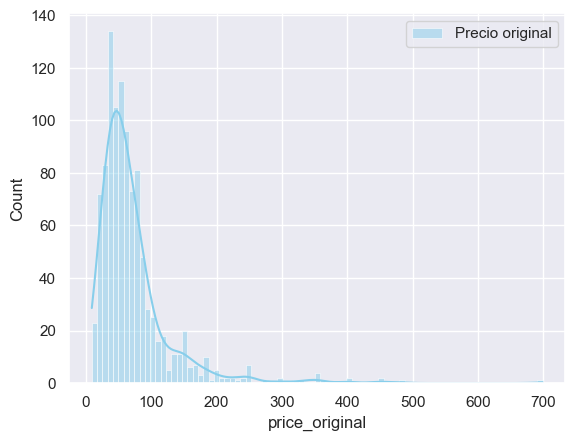

In [1360]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df_alquileres, x="price_original", color="skyblue", label="Precio original", kde=True)

plt.legend() 
plt.show()

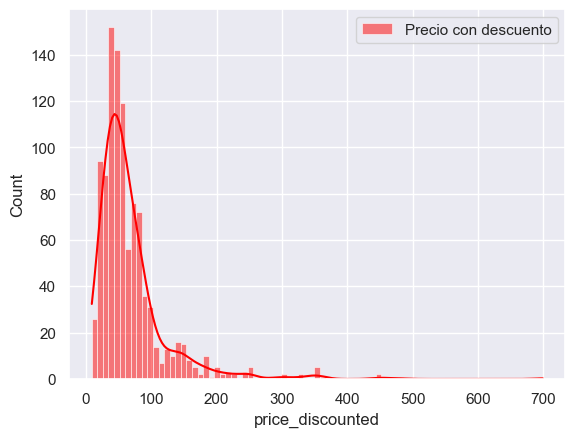

In [1361]:
sns.set_theme(style="darkgrid")

sns.histplot(data=df_alquileres, x="price_discounted", color="red", label="Precio con descuento", kde=True)
plt.legend() 
plt.show()

* ¿Observa alguna diferencia?

Observamos que la proporcion de los precios es similar, lo que hay de diferente entre los precios originales y los que tienen descuento es que el maximo es diferente. Lo cual es logico.

**<h1>5. Discretización de precios</h1>**

In [1362]:
df_alquileres['price_original'].describe()

count       1028.0
mean     71.090467
std      58.885053
min            9.0
25%           39.0
50%           56.0
75%           80.0
max          699.0
Name: price_original, dtype: Float64

In [1363]:
# binarizacion por ANCHO
# df_alquileres['wins_bin_1'] = pd.cut(x=df.Wins, bins=10)

# Guardamos los bins para comparar
datos, bines = pd.cut(x=df_alquileres['price_original'], bins=3, labels=['bajo','medio','alto'],retbins=True)

df_alquileres['price_category'] = datos

In [1364]:
df_alquileres['price_category'] = df_alquileres['price_category'].astype('category')
df_alquileres['price_category'].unique()

['bajo', 'medio', 'alto']
Categories (3, object): ['bajo' < 'medio' < 'alto']

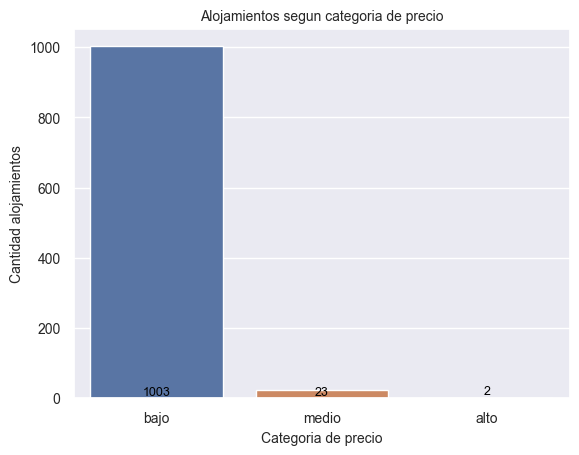

In [1365]:
sns.set_theme(style="darkgrid")

grp_1 = df_alquileres.groupby(by='price_category', as_index=False, observed = True).agg(func={'id_alojamiento': 'count'})
grp_1.columns = ['price_category', 'Cantidad']
grf = sns.barplot(x="price_category", y="Cantidad", data=grp_1, hue='price_category', errorbar=None)

plt.title("Alojamientos segun categoria de precio",
          fontsize=10)      # Titulo del grafico
# Titulo del eje x
plt.xlabel("Categoria de precio", fontsize=10)
# Titulo del eje y
plt.ylabel("Cantidad alojamientos", fontsize=10)
## plt.figure(figsize=(8, 4))  # Establecemos un tamaño, escala para el grafico
# Tamaño de las referencias de los valores de x e y
plt.tick_params(labelsize=10)


for index, row in grp_1.iterrows():
    # Seteamos el texto, redondeando los valores y formateandolso con la funcion definida previamente, damos formato c donde mostrar y tamaño de fuente por ejemplo.
    grf.text(row['price_category'], index, int(row['Cantidad']), color='black',horizontalalignment='center', verticalalignment='center', va='bottom', fontsize=9)


Observamos que la mayo cantidad de alojamientos estan dentro de la categoria de precios bajos.

**<h1>6. Análisis por provincia</h1>**

* ¿Cuántos alquileres con descuento hay por provincia?

In [1366]:
# Cantidad de alquileres con descuentos por provincia
mask = df_alquileres['discounted']
df_alquileres[mask].groupby(by='provincia', observed=True).agg(
    cant_alquileres_con_descuento=('discounted', 'sum')
).reset_index().sort_values(by='cant_alquileres_con_descuento', ascending = False)

,provincia,cant_alquileres_con_descuento
3,TIERRA DEL FUEGO,63
2,RIO NEGRO,46
0,CHUBUT,45
1,NEUQUEN,37


* De cada provincia: ¿Cuál es el alquiler más caro? ¿Y el más barato?.

In [1367]:
# Alquiler mas barato y mas caro de cada localidad
df_alquileres.groupby(by='provincia', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')
    
).reset_index().sort_values(by='alquiler_mas_caro', ascending=False)

,provincia,alquiler_mas_caro,alquiler_mas_barato
2,RIO NEGRO,699,20
3,TIERRA DEL FUEGO,480,12
0,CHUBUT,350,10
1,NEUQUEN,220,9


* ¿Qué provincia tiene más publicaciones con descuento?

In [1368]:
# Cantidad de alquileres con descuentos por provincia
mask = df_alquileres['discounted']
df_alquileres[mask].groupby(by='provincia', observed=True).agg(
    cant_publicaciones_con_descuento=('discounted', 'sum')
).reset_index().sort_values(by='cant_publicaciones_con_descuento', ascending=False).head(1)

,provincia,cant_publicaciones_con_descuento
3,TIERRA DEL FUEGO,63


*  ¿En qué ciudad se encuentra el precio más caro? ¿Y el más barato?

In [1369]:
df_alquileres.groupby(by='city', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')

).reset_index().sort_values(by='alquiler_mas_caro', ascending=False).head(1)

,city,alquiler_mas_caro,alquiler_mas_barato
3,BARILOCHE,699,21


In [1370]:
df_alquileres.groupby(by='city', observed=True).agg(
    alquiler_mas_caro=('price_discounted', 'max'),
    alquiler_mas_barato=('price_discounted', 'min')

).reset_index().sort_values(by='alquiler_mas_barato', ascending=True).head(2)

,city,alquiler_mas_caro,alquiler_mas_barato
43,NEUQUEN CAPITAL,220,9
14,CIPOLLETTI,180,9


* Por último, realice 2 gráficos de cajas (boxplots) mostrando en uno la distribución de
* precios originales por provincia, y en otro la distribución de ratings por provincia

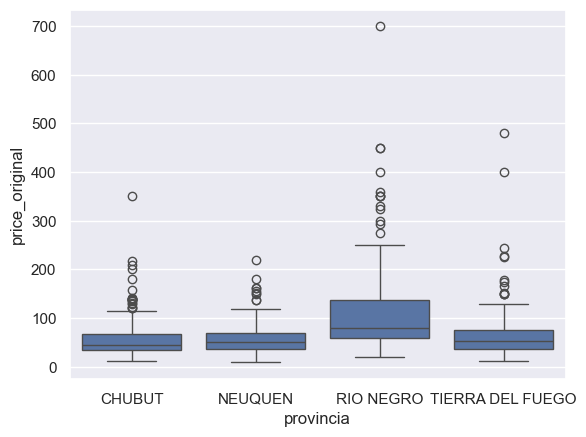

In [1371]:
box_precios_originales = sns.boxplot(y='price_original', x='provincia', data=df_alquileres)

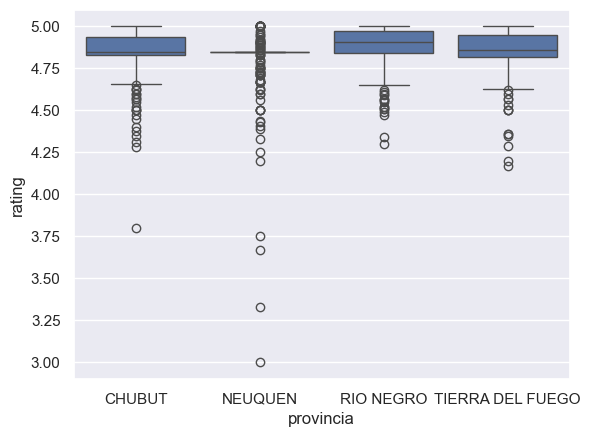

In [1372]:
box_ratings = sns.boxplot(y='rating', x='provincia', data=df_alquileres)

**<h1>7. Características del alojamiento</h1>**

* Grafico de barras para baños

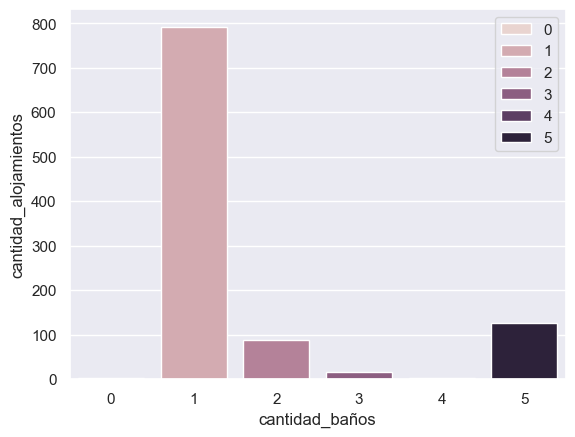

In [1373]:
df_baños= df_alquileres.groupby('baño').agg(
    cantidad_alojamientos=('id_alojamiento','count')
).reset_index()
df_baños.rename(columns={'baño':'cantidad_baños'},inplace=True)


sns.set_theme(style="darkgrid")
sns.barplot(data=df_baños, x="cantidad_baños",y='cantidad_alojamientos',hue='cantidad_baños',  errorbar=None)

plt.legend()
plt.show()

* Grafico de barras para dormitorios

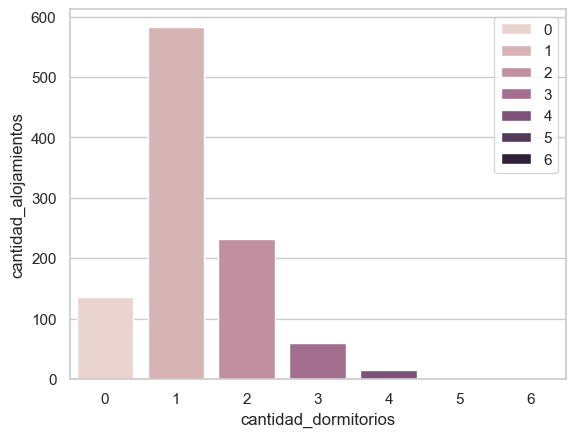

In [1374]:
df_dormitorios = df_alquileres.groupby('dormitorio').agg(
    cantidad_alojamientos=('id_alojamiento', 'count')
).reset_index()
df_dormitorios.rename(columns={'dormitorio': 'cantidad_dormitorios'}, inplace=True)
df_dormitorios['cantidad_dormitorios'] = df_dormitorios['cantidad_dormitorios'].astype('int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_dormitorios, x="cantidad_dormitorios",
            y='cantidad_alojamientos', hue='cantidad_dormitorios',  errorbar=None)

plt.legend()
plt.show()

* Grafico de barras para camas

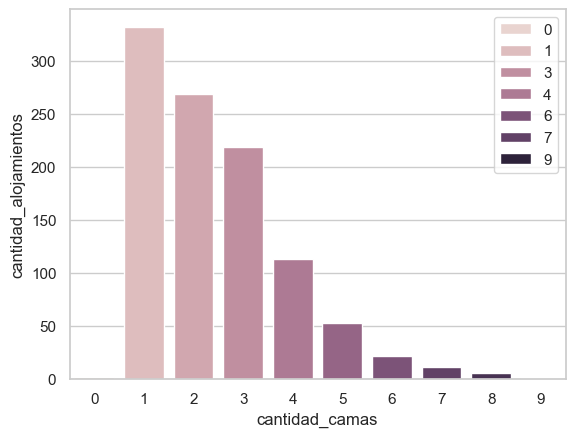

In [1375]:
df_camas = df_alquileres.groupby('cama').agg(
    cantidad_alojamientos=('id_alojamiento', 'count')
).reset_index()
df_camas.rename(
    columns={'cama': 'cantidad_camas'}, inplace=True)
df_camas['cantidad_camas'] = df_camas['cantidad_camas'].astype(
    'int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_camas, x="cantidad_camas",
            y='cantidad_alojamientos', hue='cantidad_camas',  errorbar=None)

plt.legend()
plt.show()

**<h1>8. Detección de outliers</h1>**

In [1376]:
df_alquileres.head()

,id_alojamiento,name,category,rating,city,latitude,longitude,characteristics,check_in,check_out,...,fecha_cambio_bna,cambio_bna,provincia,votaciones,best_reviews,cama,dormitorio,baño,discounted,price_category
0,855050336912355203,North Beach,entire_home,4.846171,PUERTO MADRYN,-42.756301,-65.037517,"['2 camas', '1 dormitorio', '1 baño']",2023-07-06,2023-07-12,...,2023-05-01,239.919355,CHUBUT,44,False,2,1,1,False,bajo
1,51484364,Hermoso Monoambiente con Vista al Mar y Pileta,entire_home,4.846171,PUERTO MADRYN,-42.755775,-65.037265,"['2 camas', '1 dormitorio', '1 baño', '1 cama ...",2023-07-21,2023-07-26,...,2023-05-01,239.919355,CHUBUT,44,False,2,1,1,True,bajo
2,800749301724167838,Departamento Bella Vista,entire_home,5.000000,PUERTO MADRYN,-42.768007,-65.033108,"['3 camas', '1 dormitorio', '1 baño', 'Calific...",2023-08-01,2023-08-08,...,2023-05-01,239.919355,CHUBUT,6,True,3,1,1,False,bajo
3,50769917,New Lil’ & Cozy - 100mts de la playa Puerto Ma...,entire_home,4.910000,PUERTO MADRYN,-42.777590,-65.025890,"['1 cama', '1 dormitorio', '1 baño', '1 cama q...",2023-07-09,2023-07-14,...,2023-05-01,239.919355,CHUBUT,70,False,1,1,1,False,bajo
4,916738743930751566,Front Beach,entire_home,4.846171,PUERTO MADRYN,-42.770540,-65.030810,"['2 camas', 'Monoambiente', '1 baño']",2023-07-01,2023-07-06,...,2023-05-01,239.919355,CHUBUT,44,False,2,0,1,False,bajo


In [1377]:
def estandarizar_var(X):
  promedio = np.mean(X)
  desvio = np.std(X)
  X_estandarizada = (X-promedio)/desvio
  return X_estandarizada

In [1378]:
# Edad
df_alquileres['price_standarized'] = estandarizar_var(df_alquileres['price_original'])

In [1379]:
# Función para detectar outliers
def detectar_outliers(df_estandarizado, valor_limite,referencia, variable):
  outliers = df_estandarizado.loc[np.abs(
      df_alquileres[variable]) > valor_limite, [referencia,variable]]
  return   outliers


In [1380]:
# Detectamos ouliers por ciudad
detectar_outliers(df_alquileres, 3,'city', 'price_standarized').groupby(by='city',observed=True).agg(
    cantidad_outliers_por_ciudad=('city','count')
).reset_index().sort_values(by='cantidad_outliers_por_ciudad', ascending=False)

,city,cantidad_outliers_por_ciudad
0,BARILOCHE,10
6,VILLA LA ANGOSTURA,3
5,USHUAIA,2
1,CUSHAMEN,1
2,LA VILLA,1
3,LOS LAGOS DEPARTMENT,1
4,SAN MARTIN DE LOS ANDES,1
7,VILLA LLAO LLAO,1


<Axes: xlabel='price_category', ylabel='cantidad_outliers'>

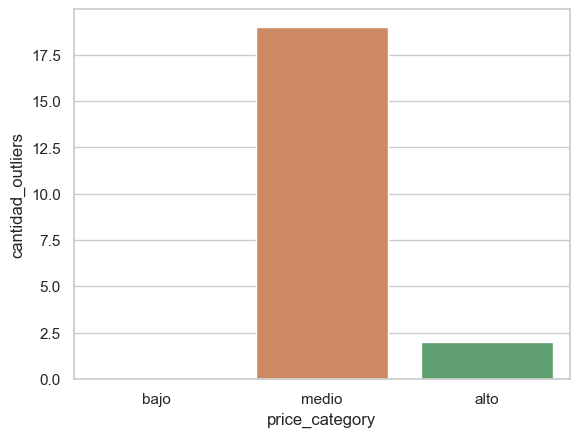

In [1381]:
# Detectamos outliers por categoria de precio
df_out_cat = detectar_outliers(df_alquileres, 3, 'price_category', 'price_standarized').groupby(by='price_category', observed=False).agg(
    cantidad_outliers=('price_category', 'count')
).reset_index().sort_values(by='cantidad_outliers', ascending=False)

sns.barplot(x="price_category", y="cantidad_outliers", hue="price_category", data=df_out_cat, errorbar=None)

* Es extraño que la mayor cantidad de outliers estan en los precios medios.
* Segun los datos, los outliers podrian estar en cualquier categoria de precio.
* Veamos la distribucion de los datos:

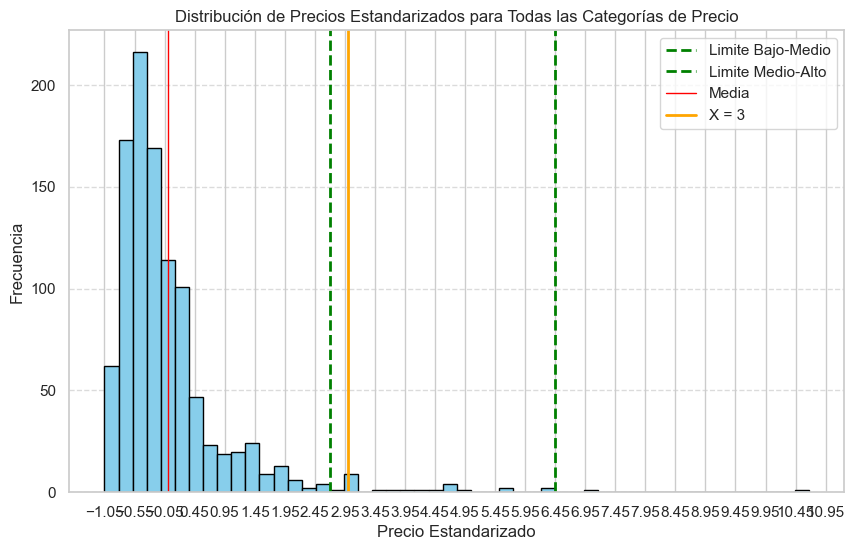

In [1399]:
# grafico de distrubucion de la variable estandarizada:

# Obtener el valor más alto donde price_category es "bajo"
limit1 = df_alquileres.loc[df_alquileres['price_category'] == 'bajo', 'price_standarized'].max()

# Obtener el valor más alto donde price_category es "medio"
limit2 = df_alquileres.loc[df_alquileres['price_category'] == 'medio', 'price_standarized'].max()

# Crear el histograma con 50 bins
counts, bins = np.histogram(df_alquileres['price_standarized'], bins=50)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], counts, width=np.diff(bins), edgecolor='black', align='edge', color='skyblue')

# Añadir líneas verticales en limit1 y limit2
plt.axvline(x=limit1, color='green', linestyle='--', linewidth=2, label='Limite Bajo-Medio')
plt.axvline(x=limit2, color='green', linestyle='--', linewidth=2, label='Limite Medio-Alto')

# Agregar media y limite de ouliers/no ouliers 
plt.axvline(x=0, color='red', linestyle='-', linewidth=1, label='Media')
plt.axvline(x=3, color='orange', linestyle='-', linewidth=2, label='X = 3')

# Configuración de los ejes y el título
plt.xlabel('Precio Estandarizado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios Estandarizados para Todas las Categorías de Precio')
plt.xticks(np.arange(min(bins), max(bins) + 0.5, 0.5))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir leyenda para identificar las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

* Al ver la dispersion asimetrica positiva del conjunto, vemos que los outliers corresponden a los valores mayores a x=3, por lo que los outliers seran precios medianos o altos.
* Esto explica el contador de outliers por categoria tan desigual

<Axes: xlabel='price_category_freq', ylabel='cantidad_outliers_por_categoria_de_precio_segun_frecuencias_iguales'>

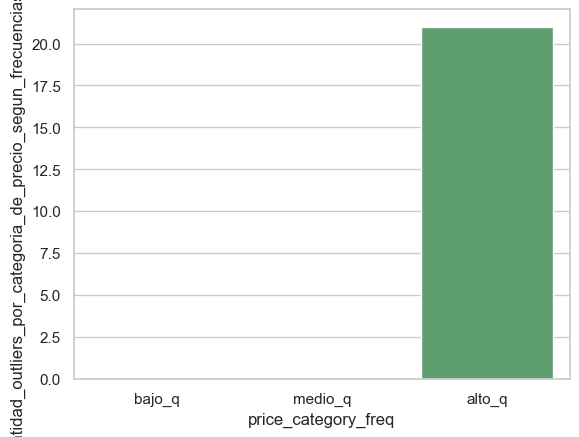

In [1397]:
# binarizacion por ANCHO
# df_alquileres['wins_bin_1'] = pd.cut(x=df.Wins, bins=10)

# Guardamos los bins para comparar
datos_freq, bines_freq = pd.qcut(x=df_alquileres['price_original'], q=3, labels=[
                      'bajo_q', 'medio_q', 'alto_q'], retbins=True)

df_alquileres['price_category_freq'] = datos_freq
df_alquileres['price_category_freq'] = df_alquileres['price_category_freq'].astype('category')





# Detectamos outliers
df_out_cat_freq = detectar_outliers(df_alquileres, 3, 'price_category_freq', 'price_standarized').groupby(by='price_category_freq', observed=False).agg(
    cantidad_outliers_por_categoria_de_precio_segun_frecuencias_iguales=(
        'price_category_freq', 'count')
).reset_index().sort_values(by='cantidad_outliers_por_categoria_de_precio_segun_frecuencias_iguales', ascending=False)

sns.barplot(x="price_category_freq", y="cantidad_outliers_por_categoria_de_precio_segun_frecuencias_iguales",
            hue="price_category_freq", data=df_out_cat_freq, errorbar=None)

Segun los datos, al tomar las observaciones y los bines segun igual frecuencia. La mayor cantidad de outliers esta en los precios de categoria alta.

In [490]:
df_alquileres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_alojamiento       1028 non-null   int64         
 1   name                 1028 non-null   object        
 2   category             1028 non-null   category      
 3   rating               1028 non-null   float64       
 4   city                 1024 non-null   category      
 5   latitude             1028 non-null   float64       
 6   longitude            1028 non-null   float64       
 7   characteristics      1028 non-null   object        
 8   check_in             1028 non-null   datetime64[ns]
 9   check_out            1028 non-null   datetime64[ns]
 10  price_discounted     1028 non-null   Int64         
 11  price_original       1028 non-null   Int64         
 12  price_qualifier      1028 non-null   category      
 13  cant_resultados      1028 non-nul

**<h1>9. Análisis estacional y de duración</h1>**

* Analizar si existe una variación estacional en los precios agrupando por mes de check_in.
* Mostrar esta variación en un gráfico de barras. Considerando la región de la Argentina de
* donde se tomaron los datos, ¿le parece que tienen sentido esos resultados?

In [491]:
# Agregamos una columna mes, basada en check_in
df_alquileres['mes'] = df_alquileres['check_in'].dt.month

In [492]:
df_mes=df_alquileres.groupby(by='mes').agg(
    promedio_precios_por_mes=('price_discounted','mean')
)
pd.options.display.float_format = '{:,.2f}'.format
df_mes.reset_index()

,mes,promedio_precios_por_mes
0,1,48.33
1,2,65.00
2,3,36.00
3,4,45.00
4,5,20.00
5,7,64.27
6,8,84.65
7,9,93.41
8,10,55.32
9,11,53.00


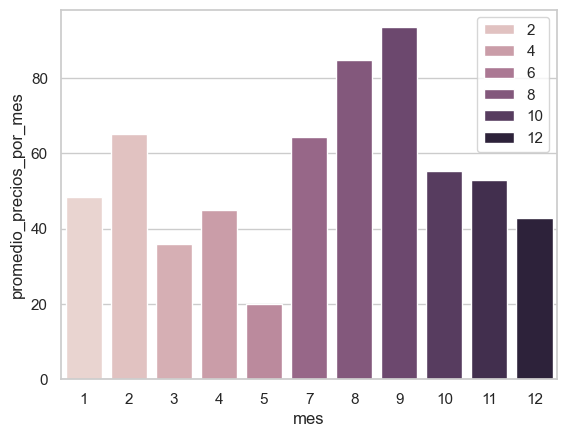

In [493]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df_mes, x="mes",
            y='promedio_precios_por_mes', hue='mes',  errorbar=None)

plt.legend()
plt.show()

* Estos resultados tienen sentido, porque serian los meses de mayo nieve. Sube el turismo

* Duración de las estancias. Calcular la duración de cada estancia utilizando las columnas
* check_in y check_out. Crear una nueva columna stay_duration que contenga la duración en días.
* ¿Existe alguna relación entre la duración de la estancia y el precio del alojamiento? 
* Graficar esta ambas variables en un scatter plot y comentar lo observado

In [494]:
# Dias de estadias
df_alquileres['stay_duration'] = (df_alquileres['check_out'] - df_alquileres['check_in']).dt.days

<Axes: xlabel='stay_duration', ylabel='price_discounted'>

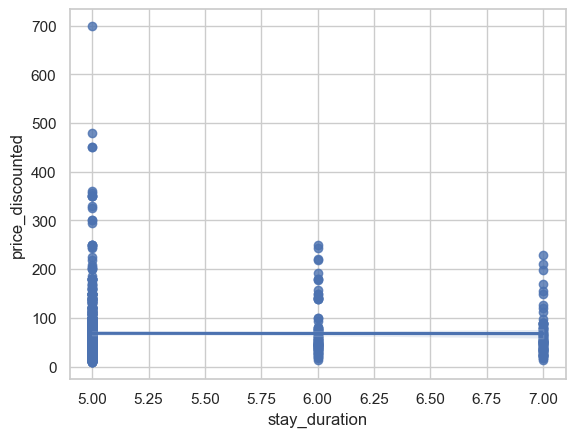

In [495]:
sns.regplot(data=df_alquileres[['stay_duration', 'price_discounted']],
            x="stay_duration", y="price_discounted", fit_reg=True)


* No pareciera haber una relacion directa.
* Lo que si vemos, que hay mas alojamientos para los 5 dias, con mucha variacion de precios a que si consideramos una estadia de 6 o 7.
* Se podria decir que a mayor estadia mayor estabilidad de precios y mas baratos en relacion a la estadia.

**<h1>10. Correlación entre precio y características</h1>**

* Habiendo creado las columnas bathrooms, bedroom y beds en el punto 7, agrupar el
* dataset por cada una de ellas, calcular el promedio de price_original y graficar cada una
* utilizando gráficos de barras 
* ¿Qué observan? 
* ¿Hay alguna tendencia? 
* ¿Siempre se cumple?

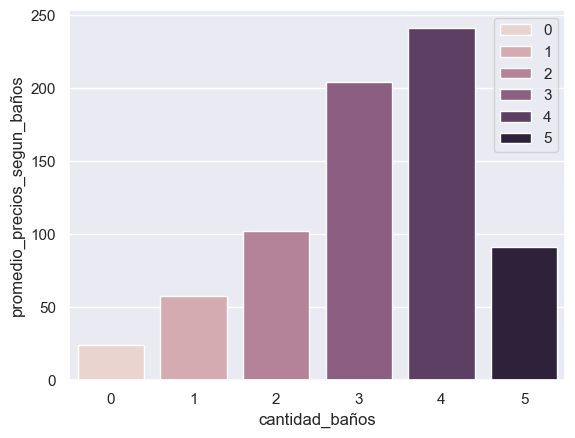

In [496]:
df_baños = df_alquileres.groupby(by='baño').agg(
    promedio_precios_segun_baños=('price_discounted', 'mean')
).reset_index()
pd.options.display.float_format = '{:,.2f}'.format



df_baños.rename(columns={'baño': 'cantidad_baños'}, inplace=True)


sns.set_theme(style="darkgrid")
sns.barplot(data=df_baños, x="cantidad_baños",
            y='promedio_precios_segun_baños', hue='cantidad_baños',  errorbar=None)

plt.legend()
plt.show()

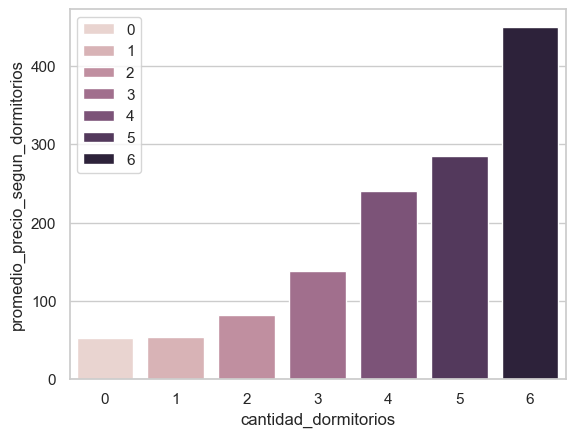

In [497]:
df_dormitorios = df_alquileres.groupby('dormitorio').agg(
    promedio_precio_segun_dormitorios=('price_discounted', 'mean')
).reset_index()
df_dormitorios.rename(
    columns={'dormitorio': 'cantidad_dormitorios'}, inplace=True)
df_dormitorios['cantidad_dormitorios'] = df_dormitorios['cantidad_dormitorios'].astype(
    'int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_dormitorios, x="cantidad_dormitorios",
            y='promedio_precio_segun_dormitorios', hue='cantidad_dormitorios',  errorbar=None)

plt.legend()
plt.show()

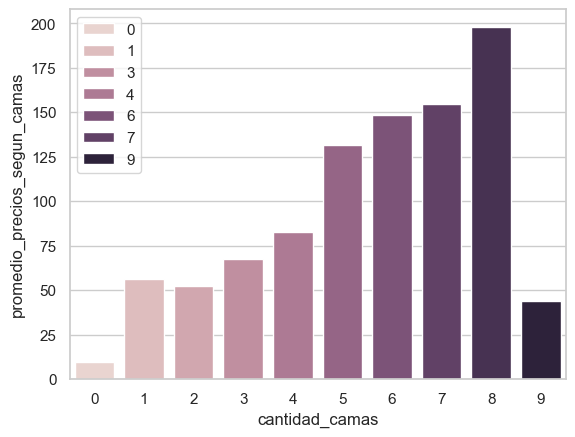

In [498]:
df_camas = df_alquileres.groupby('cama').agg(
    promedio_precios_segun_camas=('price_discounted', 'mean')
).reset_index()
df_camas.rename(
    columns={'cama': 'cantidad_camas'}, inplace=True)
df_camas['cantidad_camas'] = df_camas['cantidad_camas'].astype(
    'int')

sns.set_theme(style="whitegrid")
sns.barplot(data=df_camas, x="cantidad_camas",
            y='promedio_precios_segun_camas', hue='cantidad_camas',  errorbar=None)

plt.legend()
plt.show()

En general pareciera ser que:
+ A mas camas, mayor precio
+ A mas dormitorios, mayor precio
+ A mas baños, mayor precio
Pero llega un punto que ya no se cumple, espeialmente en camas y baños, esto podria indicar que:
+ En general, hay una cantidad de baños logicamente suficientes.
+ En general, se da que los grupos tienen un tamaño no muy grande que hasta cierta cantidad de camas es suficiente.
Por esto es que los precios, a partir de cierto numero de camas y baños no afectan tanto el precio a aumentar.

* Correlaciones

In [499]:
df_alquileres['baño'].corr(df_alquileres['price_original'])

0.25629996411637607

In [500]:
df_alquileres['dormitorio'].corr(df_alquileres['price_original'])

0.5067322332067398

In [501]:
df_alquileres['cama'].corr(df_alquileres['price_original'])

0.4002216427741159

* Pareciera ser que la que mas se asocia a la variabilidad del precio es la cantidad de dormitorios, luego seguiria la cantidad de camas y por ultimo podria ser la cantidad de baños.


* Posteriormente, sobre el dataset sin agrupar, calcular la correlación de 
* price_original Vs. cada una de esas columnas (bathrooms, bedroom y beds) 
* ¿Cuál se asocia más fuertemente con el precio? (Recordar: Correlación no implica causalidad).

In [502]:
# Creamos variables por partido
df_cor = df_alquileres[['price_original', 'baño','dormitorio','cama']]
df_cor.describe()

,price_original,baño,dormitorio,cama
count,"1,028.00","1,028.00","1,028.00","1,028.00"
mean,71.09,1.61,1.27,2.44
std,58.89,1.33,0.84,1.46
min,9.00,0.00,0.00,0.00
25%,39.00,1.00,1.00,1.00
50%,56.00,1.00,1.00,2.00
75%,80.00,1.00,2.00,3.00
max,699.00,5.00,6.00,9.00


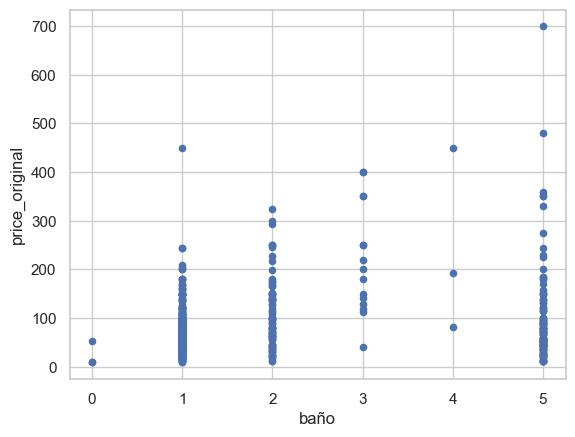

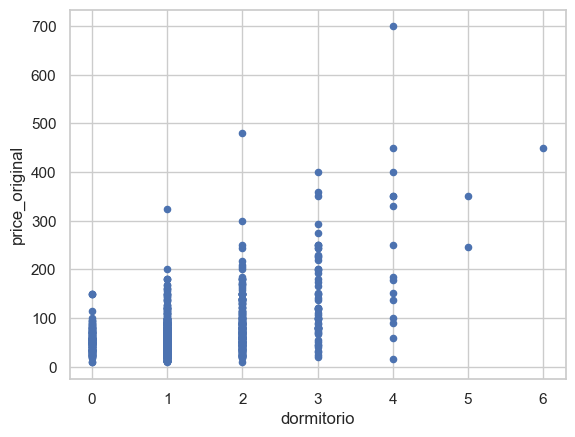

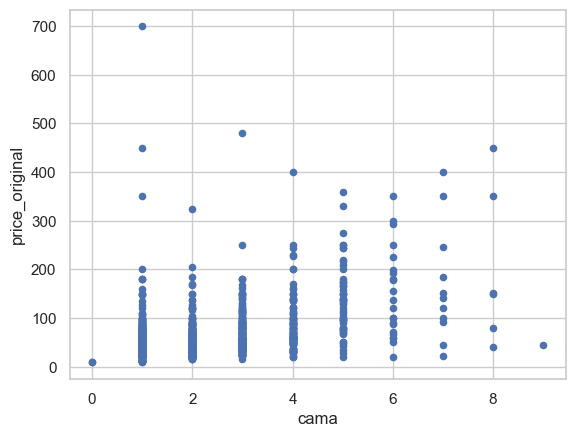

In [503]:
# Graficamos
df_cor.plot.scatter(x='baño', y='price_original')
plt.show()
df_cor.plot.scatter(x='dormitorio', y='price_original')
plt.show()
df_cor.plot.scatter(x='cama', y='price_original')
plt.show()

In [504]:
df_correlaciones = df_cor.corr()
df_correlaciones

,price_original,baño,dormitorio,cama
price_original,1.00,0.26,0.51,0.40
baño,0.26,1.00,0.36,0.23
dormitorio,0.51,0.36,1.00,0.64
cama,0.40,0.23,0.64,1.00


* Observamos que la variable que mas se asocia con el precio es la cantidad de dormitorios. Seguida por la cantidad de camas.
* Algo interesante tambien (y logico pareceria), es que pareciera que la cantidad de dormitorios y camas estan muy asociadas.